# RDD

In [4]:
bc = range(1000)

In [5]:
rdd =sc.parallelize(bc,2)

In [6]:
odds = rdd.filter(lambda x:x%2 !=0)

In [7]:
odds.take(5)

[1, 3, 5, 7, 9]

In [1]:
# this is to find the spark application in notebook 
pip install findspark

Note: you may need to restart the kernel to use updated packages.


In [1]:
# IMPORT FIND_SPARK before starting spark session in *(JUPYTER_NOTEBOOK)
>>> import findspark
>>> findspark.init()
>>> import pyspark
>>> from pyspark import SparkContext, SparkConf
>>> conf = SparkConf().setMaster("local[*]")
>>> sc = SparkContext(conf=conf)

In [2]:
sc.parallelize([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],4).map(lambda x: x**2).sum()

385

In [6]:
sc.stop()

In [3]:
dc = range(1000)

In [4]:
c =sc.parallelize(dc,2)

In [3]:
#pyspark.SparkContext('local[*]')

In [5]:
nums =[1,2,3,4]
rdd = sc.parallelize(nums)
sq = rdd.map(lambda x:x*x).collect()

In [9]:
for num in sq:
    print(num)

1
4
9
16


In [10]:
type(rdd)

pyspark.rdd.RDD

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql.functions import count

In [3]:
spark = (SparkSession.builder.appName('Totalorder').getOrCreate())

In [4]:
type(spark)

pyspark.sql.session.SparkSession

In [11]:
sales ='csv spark\sales_records.csv'

sales_df = (spark.read.format('csv').option('header','true').option("inferSchema","true").load(sales))

In [12]:
sales_df.select('Region','Country','Order ID').show(n=10,truncate = False)

+---------------------------------+---------------------+---------+
|Region                           |Country              |Order ID |
+---------------------------------+---------------------+---------+
|Middle East and North Africa     |Azerbaijan           |535113847|
|Central America and the Caribbean|Panama               |874708545|
|Sub-Saharan Africa               |Sao Tome and Principe|854349935|
|Sub-Saharan Africa               |Sao Tome and Principe|892836844|
|Central America and the Caribbean|Belize               |129280602|
|Europe                           |Denmark              |473105037|
|Europe                           |Germany              |754046475|
|Middle East and North Africa     |Turkey               |772153747|
|Europe                           |United Kingdom       |847788178|
|Asia                             |Kazakhstan           |471623599|
+---------------------------------+---------------------+---------+
only showing top 10 rows



In [14]:
type(sales_df)

pyspark.sql.dataframe.DataFrame

In [50]:
count_sales = (sales_df.select('Region','Country','Order ID')
               .groupBy('Region','Country')
               .agg(count('Order ID')
               .alias('Total Orders'))# see these double parenthesis thts what u were doing wrong stupid
               .orderBy('Total Orders',ascending =False))

In [51]:
count_sales.show(n=10,truncate = False)
print('Total rows = ',count_sales.count())

+---------------------------------+-------------+------------+
|Region                           |Country      |Total Orders|
+---------------------------------+-------------+------------+
|Sub-Saharan Africa               |Sudan        |623         |
|Australia and Oceania            |New Zealand  |593         |
|Europe                           |Vatican City |590         |
|Europe                           |Malta        |589         |
|Sub-Saharan Africa               |Mozambique   |589         |
|Middle East and North Africa     |Tunisia      |584         |
|Asia                             |Cambodia     |584         |
|Central America and the Caribbean|Panama       |578         |
|Sub-Saharan Africa               |Rwanda       |576         |
|Sub-Saharan Africa               |Cote d'Ivoire|575         |
+---------------------------------+-------------+------------+
only showing top 10 rows

Total rows =  185


In [1]:
import findspark
findspark.init()
from pyspark import SparkContext
from pyspark.sql import SparkSession
#SparkContext.setSystemProperty('spark.executor.memory', '2g')
spark = (SparkSession.builder.appName('TestingRDDs').getOrCreate())

In [7]:
words_list ='sparks is heavy hard is complex'.split(' ')

In [8]:
wrd_rdd = spark.sparkContext.parallelize(words_list)

In [5]:
words_data = wrd_rdd.collect()

In [6]:
for words in words_data:
    print(words)

sparks
is
heavy
hard
is
complex


In [7]:
wrd_rdd.count()

6

In [21]:
wrd_rdd.pop()# immutable rdds

AttributeError: 'RDD' object has no attribute 'pop'

In [20]:
wrd_rdd.distinct().count()

5

In [14]:
wrds_data = wrd_rdd.collect()
for i in wrds_data:
    print(i)

sparks
is
heavy
hard
is
complex


In [8]:
def strtwith(word,letter):
    return word.startswith(letter)

In [9]:
strtwith('stt','s')

True

In [14]:
c=wrd_rdd.filter(lambda word: strtwith(word,'s'))

In [15]:
c.collect()

['sparks']

In [17]:
num=[*range(1,21)]
print(num)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [18]:
nums_rdd = spark.sparkContext.parallelize(num)
num_squared_rdd = nums_rdd.map(lambda n: (n,n*n))

for i in num_squared_rdd.collect():
    print(i)

In [21]:
num_squared_rdd.collect()

[(1, 1),
 (2, 4),
 (3, 9),
 (4, 16),
 (5, 25),
 (6, 36),
 (7, 49),
 (8, 64),
 (9, 81),
 (10, 100),
 (11, 121),
 (12, 144),
 (13, 169),
 (14, 196),
 (15, 225),
 (16, 256),
 (17, 289),
 (18, 324),
 (19, 361),
 (20, 400)]

In [24]:
word_trd_rdd =wrd_rdd.map(lambda word: (word,word[0],strtwith(word,'s')))

In [26]:
word_trd_rdd.collect()

[('sparks', 's', True),
 ('is', 'i', False),
 ('heavy', 'h', False),
 ('hard', 'h', False),
 ('is', 'i', False),
 ('complex', 'c', False)]

In [34]:
wrd_rdd.flatMap(lambda x: list(x)).take(10)

['s', 'p', 'a', 'r', 'k', 's', 'i', 's', 'h', 'e']

In [37]:
country_list = [('india',91),('usa',4),('greece',13)]
country_rdd = spark.sparkContext.parallelize(country_list)

In [38]:
sortt = country_rdd.sortByKey().collect()

In [39]:
for i in sortt:
    print(i)

('greece', 13)
('india', 91)
('usa', 4)


In [41]:
sortt =country_rdd.map(lambda c: (c[1],c[0])).sortByKey(False).collect()# printed value in descending order by providing Fasle

In [43]:
country_rdd.map(lambda c: (c[1],c[0])).collect()

[(91, 'india'), (4, 'usa'), (13, 'greece')]

In [4]:
num=[1,5,2,3,4]
result = spark.sparkContext.parallelize(num).reduce(lambda x ,y:x+y)
print(result)

15


In [33]:
# by reduce we mean to aggregate value into one value result
def sum(x,y):
    print(x,y)
    return x+y
result = spark.sparkContext.parallelize(num).reduce(lambda x,y : sum(x,y))# x  will store the accumulation of both nd y will have new value assigned
print(result)

1 5
6 2
8 3
11 4
15


In [34]:
def wrdlngthreducer(leftword,rightword):
    print('d',leftword,rightword)
    if len(leftword) > len(rightword):
        print(leftword,rightword)
        return leftword
    else:
        print('2',leftword,rightword)
        return rightword

In [16]:
r=wrd_rdd.reduce(wrdlngthreducer)

d sparks is
sparks is
d sparks heavy
sparks heavy
d sparks hard
sparks hard
d sparks is
sparks is
d sparks complex
2 sparks complex


In [14]:
print(r)

complex


In [39]:
tmplist =[59,57.2,53.6,55.4,53.8,53.6,55.4]
temprdd=spark.sparkContext.parallelize(tmplist)
temprdd.collect()

[59, 57.2, 53.6, 55.4, 53.8, 53.6, 55.4]

In [40]:
def farenheit(temp):
    celsius =(temp-32)*5/9
    return celsius

In [41]:
farenheit(59)

15.0

In [43]:
tempfrdd = temprdd.map(farenheit)
tempfrdd.collect()

[15.0, 14.000000000000002, 12.0, 13.0, 12.111111111111109, 12.0, 13.0]

In [46]:
temfahrdd = tempfrdd.filter(lambda x: x>=13)#.map will return true false values
temfahrdd.collect()

[15.0, 14.000000000000002, 13.0, 13.0]

In [2]:
data2001list=['RIN1','RIN2','RIN3','RIN4','RIN5','RIN6','RIN7']
data2002list=['RIN3','RIN4','RIN7','RIN8','RIN9']
data2003list=['RIN4','RIN8','RIN10','RIN11','RIN12']

In [3]:
data2001rdd =spark.sparkContext.parallelize(data2001list)
data2002rdd =spark.sparkContext.parallelize(data2002list)
data2003rdd =spark.sparkContext.parallelize(data2003list)

In [4]:
union = data2001rdd.union(data2002rdd)
union.collect()

['RIN1',
 'RIN2',
 'RIN3',
 'RIN4',
 'RIN5',
 'RIN6',
 'RIN7',
 'RIN3',
 'RIN4',
 'RIN7',
 'RIN8',
 'RIN9']

In [5]:
researchrdd =union.union(data2003rdd).distinct()
researchrdd.collect()

['RIN4',
 'RIN10',
 'RIN2',
 'RIN5',
 'RIN11',
 'RIN6',
 'RIN1',
 'RIN9',
 'RIN12',
 'RIN3',
 'RIN8',
 'RIN7']

In [6]:
researchrdd.count()

12

In [7]:
firstyear = data2001rdd.subtract(data2002rdd)
firstyear.collect()

['RIN6', 'RIN2', 'RIN5', 'RIN1']

In [8]:
unions=union.subtract(data2003rdd).distinct()
unions.collect()

['RIN2', 'RIN5', 'RIN6', 'RIN1', 'RIN9', 'RIN3', 'RIN7']

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField,StringType,IntegerType

In [4]:
spark = (SparkSession.builder.appName('pysparkpractice').getOrCreate())

In [5]:
data = [("James","","Smith","36636","M",3000),
    ("Michael","Rose","","40288","M",4000),
    ("Robert","","Williams","42114","M",4000),
    ("Maria","Anne","Jones","39192","F",4000),
    ("Jen","Mary","Brown","","F",-1)
  ]

In [6]:
type(data)

list

In [9]:
schema = StructType([StructField('firstname',StringType(),True),
                    StructField('Middlename',StringType(),True),
                    StructField('lastname',StringType(),True),
                    StructField('id',StringType(),True),
                    StructField('gender',StringType(),True),
                    StructField('salary',IntegerType(),True),])

In [10]:
df =spark.createDataFrame(data =data,schema =schema)
df.printSchema()

root
 |-- firstname: string (nullable = true)
 |-- Middlename: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: integer (nullable = true)



In [11]:
df.show(truncate=False)

+---------+----------+--------+-----+------+------+
|firstname|Middlename|lastname|id   |gender|salary|
+---------+----------+--------+-----+------+------+
|James    |          |Smith   |36636|M     |3000  |
|Michael  |Rose      |        |40288|M     |4000  |
|Robert   |          |Williams|42114|M     |4000  |
|Maria    |Anne      |Jones   |39192|F     |4000  |
|Jen      |Mary      |Brown   |     |F     |-1    |
+---------+----------+--------+-----+------+------+



In [63]:
file_path=r'C:\Users\Asus\csv spark\f.csv'
fire_df = (spark.read.format('csv')
          .option('header',True)
           .option('inferSchema',True)
            .load(file_path))

AnalysisException: Path does not exist: file:/C:/Users/Asus/csv spark/f.csv

In [62]:
fire_df.select('Incident Number','Incident Date','City').show(10)

AnalysisException: cannot resolve '`Incident Number`' given input columns: [Address, AlarmDtTm, ArrivalDtTm, Battalion, Box, CallNumber, City, CloseDtTm, EMSPersonnel, EMSUnits, EstimatedContentsLoss, EstimatedPropertyLoss, ExposureNumber, FireFatalities, FirstUnitOnScene, ID, IncidentDate, IncidentNumber, OtherPersonnel, OtherUnits, StationArea, SuppressionPersonnel, SuppressionUnits, zipcode];
'Project ['Incident Number, 'Incident Date, City#2341]
+- Project [IncidentNumber#2116, ExposureNumber#2141, ID#2166, Address#2191, IncidentDate#2216, CallNumber#2241, AlarmDtTm#2266, ArrivalDtTm#2291, CloseDtTm#2316, City#2341, zipcode#2366, Battalion#2391, StationArea#2416, Box#2441, SuppressionUnits#2466, SuppressionPersonnel#2491, EMSUnits#2516, EMSPersonnel#2541, OtherUnits#2566, OtherPersonnel#2591, FirstUnitOnScene#2616, EstimatedPropertyLoss#2641, EstimatedContentsLoss#2666, Fire Fatalities#2091 AS FireFatalities#2691]
   +- Project [IncidentNumber#2116, ExposureNumber#2141, ID#2166, Address#2191, IncidentDate#2216, CallNumber#2241, AlarmDtTm#2266, ArrivalDtTm#2291, CloseDtTm#2316, City#2341, zipcode#2366, Battalion#2391, StationArea#2416, Box#2441, SuppressionUnits#2466, SuppressionPersonnel#2491, EMSUnits#2516, EMSPersonnel#2541, OtherUnits#2566, OtherPersonnel#2591, FirstUnitOnScene#2616, EstimatedPropertyLoss#2641, Estimated Contents Loss#2066 AS EstimatedContentsLoss#2666, Fire Fatalities#2091]
      +- Project [IncidentNumber#2116, ExposureNumber#2141, ID#2166, Address#2191, IncidentDate#2216, CallNumber#2241, AlarmDtTm#2266, ArrivalDtTm#2291, CloseDtTm#2316, City#2341, zipcode#2366, Battalion#2391, StationArea#2416, Box#2441, SuppressionUnits#2466, SuppressionPersonnel#2491, EMSUnits#2516, EMSPersonnel#2541, OtherUnits#2566, OtherPersonnel#2591, FirstUnitOnScene#2616, Estimated Property Loss#2041 AS EstimatedPropertyLoss#2641, Estimated Contents Loss#2066, Fire Fatalities#2091]
         +- Project [IncidentNumber#2116, ExposureNumber#2141, ID#2166, Address#2191, IncidentDate#2216, CallNumber#2241, AlarmDtTm#2266, ArrivalDtTm#2291, CloseDtTm#2316, City#2341, zipcode#2366, Battalion#2391, StationArea#2416, Box#2441, SuppressionUnits#2466, SuppressionPersonnel#2491, EMSUnits#2516, EMSPersonnel#2541, OtherUnits#2566, OtherPersonnel#2591, First Unit On Scene#2016 AS FirstUnitOnScene#2616, Estimated Property Loss#2041, Estimated Contents Loss#2066, Fire Fatalities#2091]
            +- Project [IncidentNumber#2116, ExposureNumber#2141, ID#2166, Address#2191, IncidentDate#2216, CallNumber#2241, AlarmDtTm#2266, ArrivalDtTm#2291, CloseDtTm#2316, City#2341, zipcode#2366, Battalion#2391, StationArea#2416, Box#2441, SuppressionUnits#2466, SuppressionPersonnel#2491, EMSUnits#2516, EMSPersonnel#2541, OtherUnits#2566, Other Personnel#1991 AS OtherPersonnel#2591, First Unit On Scene#2016, Estimated Property Loss#2041, Estimated Contents Loss#2066, Fire Fatalities#2091]
               +- Project [IncidentNumber#2116, ExposureNumber#2141, ID#2166, Address#2191, IncidentDate#2216, CallNumber#2241, AlarmDtTm#2266, ArrivalDtTm#2291, CloseDtTm#2316, City#2341, zipcode#2366, Battalion#2391, StationArea#2416, Box#2441, SuppressionUnits#2466, SuppressionPersonnel#2491, EMSUnits#2516, EMSPersonnel#2541, Other Units#1966 AS OtherUnits#2566, Other Personnel#1991, First Unit On Scene#2016, Estimated Property Loss#2041, Estimated Contents Loss#2066, Fire Fatalities#2091]
                  +- Project [IncidentNumber#2116, ExposureNumber#2141, ID#2166, Address#2191, IncidentDate#2216, CallNumber#2241, AlarmDtTm#2266, ArrivalDtTm#2291, CloseDtTm#2316, City#2341, zipcode#2366, Battalion#2391, StationArea#2416, Box#2441, SuppressionUnits#2466, SuppressionPersonnel#2491, EMSUnits#2516, EMS Personnel#1941 AS EMSPersonnel#2541, Other Units#1966, Other Personnel#1991, First Unit On Scene#2016, Estimated Property Loss#2041, Estimated Contents Loss#2066, Fire Fatalities#2091]
                     +- Project [IncidentNumber#2116, ExposureNumber#2141, ID#2166, Address#2191, IncidentDate#2216, CallNumber#2241, AlarmDtTm#2266, ArrivalDtTm#2291, CloseDtTm#2316, City#2341, zipcode#2366, Battalion#2391, StationArea#2416, Box#2441, SuppressionUnits#2466, SuppressionPersonnel#2491, EMS Units#1916 AS EMSUnits#2516, EMS Personnel#1941, Other Units#1966, Other Personnel#1991, First Unit On Scene#2016, Estimated Property Loss#2041, Estimated Contents Loss#2066, Fire Fatalities#2091]
                        +- Project [IncidentNumber#2116, ExposureNumber#2141, ID#2166, Address#2191, IncidentDate#2216, CallNumber#2241, AlarmDtTm#2266, ArrivalDtTm#2291, CloseDtTm#2316, City#2341, zipcode#2366, Battalion#2391, StationArea#2416, Box#2441, SuppressionUnits#2466, Suppression Personnel#1891 AS SuppressionPersonnel#2491, EMS Units#1916, EMS Personnel#1941, Other Units#1966, Other Personnel#1991, First Unit On Scene#2016, Estimated Property Loss#2041, Estimated Contents Loss#2066, Fire Fatalities#2091]
                           +- Project [IncidentNumber#2116, ExposureNumber#2141, ID#2166, Address#2191, IncidentDate#2216, CallNumber#2241, AlarmDtTm#2266, ArrivalDtTm#2291, CloseDtTm#2316, City#2341, zipcode#2366, Battalion#2391, StationArea#2416, Box#2441, Suppression Units#1866 AS SuppressionUnits#2466, Suppression Personnel#1891, EMS Units#1916, EMS Personnel#1941, Other Units#1966, Other Personnel#1991, First Unit On Scene#2016, Estimated Property Loss#2041, Estimated Contents Loss#2066, Fire Fatalities#2091]
                              +- Project [IncidentNumber#2116, ExposureNumber#2141, ID#2166, Address#2191, IncidentDate#2216, CallNumber#2241, AlarmDtTm#2266, ArrivalDtTm#2291, CloseDtTm#2316, City#2341, zipcode#2366, Battalion#2391, StationArea#2416, Box#1841 AS Box#2441, Suppression Units#1866, Suppression Personnel#1891, EMS Units#1916, EMS Personnel#1941, Other Units#1966, Other Personnel#1991, First Unit On Scene#2016, Estimated Property Loss#2041, Estimated Contents Loss#2066, Fire Fatalities#2091]
                                 +- Project [IncidentNumber#2116, ExposureNumber#2141, ID#2166, Address#2191, IncidentDate#2216, CallNumber#2241, AlarmDtTm#2266, ArrivalDtTm#2291, CloseDtTm#2316, City#2341, zipcode#2366, Battalion#2391, Station Area#1816 AS StationArea#2416, Box#1841, Suppression Units#1866, Suppression Personnel#1891, EMS Units#1916, EMS Personnel#1941, Other Units#1966, Other Personnel#1991, First Unit On Scene#2016, Estimated Property Loss#2041, Estimated Contents Loss#2066, Fire Fatalities#2091]
                                    +- Project [IncidentNumber#2116, ExposureNumber#2141, ID#2166, Address#2191, IncidentDate#2216, CallNumber#2241, AlarmDtTm#2266, ArrivalDtTm#2291, CloseDtTm#2316, City#2341, zipcode#2366, Battalion#1791 AS Battalion#2391, Station Area#1816, Box#1841, Suppression Units#1866, Suppression Personnel#1891, EMS Units#1916, EMS Personnel#1941, Other Units#1966, Other Personnel#1991, First Unit On Scene#2016, Estimated Property Loss#2041, Estimated Contents Loss#2066, Fire Fatalities#2091]
                                       +- Project [IncidentNumber#2116, ExposureNumber#2141, ID#2166, Address#2191, IncidentDate#2216, CallNumber#2241, AlarmDtTm#2266, ArrivalDtTm#2291, CloseDtTm#2316, City#2341, zipcode#1766 AS zipcode#2366, Battalion#1791, Station Area#1816, Box#1841, Suppression Units#1866, Suppression Personnel#1891, EMS Units#1916, EMS Personnel#1941, Other Units#1966, Other Personnel#1991, First Unit On Scene#2016, Estimated Property Loss#2041, Estimated Contents Loss#2066, Fire Fatalities#2091]
                                          +- Project [IncidentNumber#2116, ExposureNumber#2141, ID#2166, Address#2191, IncidentDate#2216, CallNumber#2241, AlarmDtTm#2266, ArrivalDtTm#2291, CloseDtTm#2316, City#1741 AS City#2341, zipcode#1766, Battalion#1791, Station Area#1816, Box#1841, Suppression Units#1866, Suppression Personnel#1891, EMS Units#1916, EMS Personnel#1941, Other Units#1966, Other Personnel#1991, First Unit On Scene#2016, Estimated Property Loss#2041, Estimated Contents Loss#2066, Fire Fatalities#2091]
                                             +- Project [IncidentNumber#2116, ExposureNumber#2141, ID#2166, Address#2191, IncidentDate#2216, CallNumber#2241, AlarmDtTm#2266, ArrivalDtTm#2291, Close DtTm#1716 AS CloseDtTm#2316, City#1741, zipcode#1766, Battalion#1791, Station Area#1816, Box#1841, Suppression Units#1866, Suppression Personnel#1891, EMS Units#1916, EMS Personnel#1941, Other Units#1966, Other Personnel#1991, First Unit On Scene#2016, Estimated Property Loss#2041, Estimated Contents Loss#2066, Fire Fatalities#2091]
                                                +- Project [IncidentNumber#2116, ExposureNumber#2141, ID#2166, Address#2191, IncidentDate#2216, CallNumber#2241, AlarmDtTm#2266, Arrival DtTm#1691 AS ArrivalDtTm#2291, Close DtTm#1716, City#1741, zipcode#1766, Battalion#1791, Station Area#1816, Box#1841, Suppression Units#1866, Suppression Personnel#1891, EMS Units#1916, EMS Personnel#1941, Other Units#1966, Other Personnel#1991, First Unit On Scene#2016, Estimated Property Loss#2041, Estimated Contents Loss#2066, Fire Fatalities#2091]
                                                   +- Project [IncidentNumber#2116, ExposureNumber#2141, ID#2166, Address#2191, IncidentDate#2216, CallNumber#2241, Alarm DtTm#1666 AS AlarmDtTm#2266, Arrival DtTm#1691, Close DtTm#1716, City#1741, zipcode#1766, Battalion#1791, Station Area#1816, Box#1841, Suppression Units#1866, Suppression Personnel#1891, EMS Units#1916, EMS Personnel#1941, Other Units#1966, Other Personnel#1991, First Unit On Scene#2016, Estimated Property Loss#2041, Estimated Contents Loss#2066, Fire Fatalities#2091]
                                                      +- Project [IncidentNumber#2116, ExposureNumber#2141, ID#2166, Address#2191, IncidentDate#2216, Call Number#1641 AS CallNumber#2241, Alarm DtTm#1666, Arrival DtTm#1691, Close DtTm#1716, City#1741, zipcode#1766, Battalion#1791, Station Area#1816, Box#1841, Suppression Units#1866, Suppression Personnel#1891, EMS Units#1916, EMS Personnel#1941, Other Units#1966, Other Personnel#1991, First Unit On Scene#2016, Estimated Property Loss#2041, Estimated Contents Loss#2066, Fire Fatalities#2091]
                                                         +- Project [IncidentNumber#2116, ExposureNumber#2141, ID#2166, Address#2191, Incident Date#1616 AS IncidentDate#2216, Call Number#1641, Alarm DtTm#1666, Arrival DtTm#1691, Close DtTm#1716, City#1741, zipcode#1766, Battalion#1791, Station Area#1816, Box#1841, Suppression Units#1866, Suppression Personnel#1891, EMS Units#1916, EMS Personnel#1941, Other Units#1966, Other Personnel#1991, First Unit On Scene#2016, Estimated Property Loss#2041, Estimated Contents Loss#2066, Fire Fatalities#2091]
                                                            +- Project [IncidentNumber#2116, ExposureNumber#2141, ID#2166, Address#1591 AS Address#2191, Incident Date#1616, Call Number#1641, Alarm DtTm#1666, Arrival DtTm#1691, Close DtTm#1716, City#1741, zipcode#1766, Battalion#1791, Station Area#1816, Box#1841, Suppression Units#1866, Suppression Personnel#1891, EMS Units#1916, EMS Personnel#1941, Other Units#1966, Other Personnel#1991, First Unit On Scene#2016, Estimated Property Loss#2041, Estimated Contents Loss#2066, Fire Fatalities#2091]
                                                               +- Project [IncidentNumber#2116, ExposureNumber#2141, ID#1566 AS ID#2166, Address#1591, Incident Date#1616, Call Number#1641, Alarm DtTm#1666, Arrival DtTm#1691, Close DtTm#1716, City#1741, zipcode#1766, Battalion#1791, Station Area#1816, Box#1841, Suppression Units#1866, Suppression Personnel#1891, EMS Units#1916, EMS Personnel#1941, Other Units#1966, Other Personnel#1991, First Unit On Scene#2016, Estimated Property Loss#2041, Estimated Contents Loss#2066, Fire Fatalities#2091]
                                                                  +- Project [IncidentNumber#2116, Exposure Number#1541 AS ExposureNumber#2141, ID#1566, Address#1591, Incident Date#1616, Call Number#1641, Alarm DtTm#1666, Arrival DtTm#1691, Close DtTm#1716, City#1741, zipcode#1766, Battalion#1791, Station Area#1816, Box#1841, Suppression Units#1866, Suppression Personnel#1891, EMS Units#1916, EMS Personnel#1941, Other Units#1966, Other Personnel#1991, First Unit On Scene#2016, Estimated Property Loss#2041, Estimated Contents Loss#2066, Fire Fatalities#2091]
                                                                     +- Project [Incident Number#1516 AS IncidentNumber#2116, Exposure Number#1541, ID#1566, Address#1591, Incident Date#1616, Call Number#1641, Alarm DtTm#1666, Arrival DtTm#1691, Close DtTm#1716, City#1741, zipcode#1766, Battalion#1791, Station Area#1816, Box#1841, Suppression Units#1866, Suppression Personnel#1891, EMS Units#1916, EMS Personnel#1941, Other Units#1966, Other Personnel#1991, First Unit On Scene#2016, Estimated Property Loss#2041, Estimated Contents Loss#2066, Fire Fatalities#2091]
                                                                        +- Project [Incident Number#1516, Exposure Number#1541, ID#1566, Address#1591, Incident Date#1616, Call Number#1641, Alarm DtTm#1666, Arrival DtTm#1691, Close DtTm#1716, City#1741, zipcode#1766, Battalion#1791, Station Area#1816, Box#1841, Suppression Units#1866, Suppression Personnel#1891, EMS Units#1916, EMS Personnel#1941, Other Units#1966, Other Personnel#1991, First Unit On Scene#2016, Estimated Property Loss#2041, Estimated Contents Loss#2066, Fire Fatalities#1491 AS Fire Fatalities#2091]
                                                                           +- Project [Incident Number#1516, Exposure Number#1541, ID#1566, Address#1591, Incident Date#1616, Call Number#1641, Alarm DtTm#1666, Arrival DtTm#1691, Close DtTm#1716, City#1741, zipcode#1766, Battalion#1791, Station Area#1816, Box#1841, Suppression Units#1866, Suppression Personnel#1891, EMS Units#1916, EMS Personnel#1941, Other Units#1966, Other Personnel#1991, First Unit On Scene#2016, Estimated Property Loss#2041, Estimated Contents Loss#1466 AS Estimated Contents Loss#2066, Fire Fatalities#1491]
                                                                              +- Project [Incident Number#1516, Exposure Number#1541, ID#1566, Address#1591, Incident Date#1616, Call Number#1641, Alarm DtTm#1666, Arrival DtTm#1691, Close DtTm#1716, City#1741, zipcode#1766, Battalion#1791, Station Area#1816, Box#1841, Suppression Units#1866, Suppression Personnel#1891, EMS Units#1916, EMS Personnel#1941, Other Units#1966, Other Personnel#1991, First Unit On Scene#2016, Estimated Property Loss#1441 AS Estimated Property Loss#2041, Estimated Contents Loss#1466, Fire Fatalities#1491]
                                                                                 +- Project [Incident Number#1516, Exposure Number#1541, ID#1566, Address#1591, Incident Date#1616, Call Number#1641, Alarm DtTm#1666, Arrival DtTm#1691, Close DtTm#1716, City#1741, zipcode#1766, Battalion#1791, Station Area#1816, Box#1841, Suppression Units#1866, Suppression Personnel#1891, EMS Units#1916, EMS Personnel#1941, Other Units#1966, Other Personnel#1991, First Unit On Scene#1416 AS First Unit On Scene#2016, Estimated Property Loss#1441, Estimated Contents Loss#1466, Fire Fatalities#1491]
                                                                                    +- Project [Incident Number#1516, Exposure Number#1541, ID#1566, Address#1591, Incident Date#1616, Call Number#1641, Alarm DtTm#1666, Arrival DtTm#1691, Close DtTm#1716, City#1741, zipcode#1766, Battalion#1791, Station Area#1816, Box#1841, Suppression Units#1866, Suppression Personnel#1891, EMS Units#1916, EMS Personnel#1941, Other Units#1966, Other Personnel#1391 AS Other Personnel#1991, First Unit On Scene#1416, Estimated Property Loss#1441, Estimated Contents Loss#1466, Fire Fatalities#1491]
                                                                                       +- Project [Incident Number#1516, Exposure Number#1541, ID#1566, Address#1591, Incident Date#1616, Call Number#1641, Alarm DtTm#1666, Arrival DtTm#1691, Close DtTm#1716, City#1741, zipcode#1766, Battalion#1791, Station Area#1816, Box#1841, Suppression Units#1866, Suppression Personnel#1891, EMS Units#1916, EMS Personnel#1941, Other Units#1366 AS Other Units#1966, Other Personnel#1391, First Unit On Scene#1416, Estimated Property Loss#1441, Estimated Contents Loss#1466, Fire Fatalities#1491]
                                                                                          +- Project [Incident Number#1516, Exposure Number#1541, ID#1566, Address#1591, Incident Date#1616, Call Number#1641, Alarm DtTm#1666, Arrival DtTm#1691, Close DtTm#1716, City#1741, zipcode#1766, Battalion#1791, Station Area#1816, Box#1841, Suppression Units#1866, Suppression Personnel#1891, EMS Units#1916, EMS Personnel#1341 AS EMS Personnel#1941, Other Units#1366, Other Personnel#1391, First Unit On Scene#1416, Estimated Property Loss#1441, Estimated Contents Loss#1466, Fire Fatalities#1491]
                                                                                             +- Project [Incident Number#1516, Exposure Number#1541, ID#1566, Address#1591, Incident Date#1616, Call Number#1641, Alarm DtTm#1666, Arrival DtTm#1691, Close DtTm#1716, City#1741, zipcode#1766, Battalion#1791, Station Area#1816, Box#1841, Suppression Units#1866, Suppression Personnel#1891, EMS Units#1316 AS EMS Units#1916, EMS Personnel#1341, Other Units#1366, Other Personnel#1391, First Unit On Scene#1416, Estimated Property Loss#1441, Estimated Contents Loss#1466, Fire Fatalities#1491]
                                                                                                +- Project [Incident Number#1516, Exposure Number#1541, ID#1566, Address#1591, Incident Date#1616, Call Number#1641, Alarm DtTm#1666, Arrival DtTm#1691, Close DtTm#1716, City#1741, zipcode#1766, Battalion#1791, Station Area#1816, Box#1841, Suppression Units#1866, Suppression Personnel#1291 AS Suppression Personnel#1891, EMS Units#1316, EMS Personnel#1341, Other Units#1366, Other Personnel#1391, First Unit On Scene#1416, Estimated Property Loss#1441, Estimated Contents Loss#1466, Fire Fatalities#1491]
                                                                                                   +- Project [Incident Number#1516, Exposure Number#1541, ID#1566, Address#1591, Incident Date#1616, Call Number#1641, Alarm DtTm#1666, Arrival DtTm#1691, Close DtTm#1716, City#1741, zipcode#1766, Battalion#1791, Station Area#1816, Box#1841, Suppression Units#1266 AS Suppression Units#1866, Suppression Personnel#1291, EMS Units#1316, EMS Personnel#1341, Other Units#1366, Other Personnel#1391, First Unit On Scene#1416, Estimated Property Loss#1441, Estimated Contents Loss#1466, Fire Fatalities#1491]
                                                                                                      +- Project [Incident Number#1516, Exposure Number#1541, ID#1566, Address#1591, Incident Date#1616, Call Number#1641, Alarm DtTm#1666, Arrival DtTm#1691, Close DtTm#1716, City#1741, zipcode#1766, Battalion#1791, Station Area#1816, Box#1241 AS Box#1841, Suppression Units#1266, Suppression Personnel#1291, EMS Units#1316, EMS Personnel#1341, Other Units#1366, Other Personnel#1391, First Unit On Scene#1416, Estimated Property Loss#1441, Estimated Contents Loss#1466, Fire Fatalities#1491]
                                                                                                         +- Project [Incident Number#1516, Exposure Number#1541, ID#1566, Address#1591, Incident Date#1616, Call Number#1641, Alarm DtTm#1666, Arrival DtTm#1691, Close DtTm#1716, City#1741, zipcode#1766, Battalion#1791, Station Area#1216 AS Station Area#1816, Box#1241, Suppression Units#1266, Suppression Personnel#1291, EMS Units#1316, EMS Personnel#1341, Other Units#1366, Other Personnel#1391, First Unit On Scene#1416, Estimated Property Loss#1441, Estimated Contents Loss#1466, Fire Fatalities#1491]
                                                                                                            +- Project [Incident Number#1516, Exposure Number#1541, ID#1566, Address#1591, Incident Date#1616, Call Number#1641, Alarm DtTm#1666, Arrival DtTm#1691, Close DtTm#1716, City#1741, zipcode#1766, Battalion#1191 AS Battalion#1791, Station Area#1216, Box#1241, Suppression Units#1266, Suppression Personnel#1291, EMS Units#1316, EMS Personnel#1341, Other Units#1366, Other Personnel#1391, First Unit On Scene#1416, Estimated Property Loss#1441, Estimated Contents Loss#1466, Fire Fatalities#1491]
                                                                                                               +- Project [Incident Number#1516, Exposure Number#1541, ID#1566, Address#1591, Incident Date#1616, Call Number#1641, Alarm DtTm#1666, Arrival DtTm#1691, Close DtTm#1716, City#1741, zipcode#1166 AS zipcode#1766, Battalion#1191, Station Area#1216, Box#1241, Suppression Units#1266, Suppression Personnel#1291, EMS Units#1316, EMS Personnel#1341, Other Units#1366, Other Personnel#1391, First Unit On Scene#1416, Estimated Property Loss#1441, Estimated Contents Loss#1466, Fire Fatalities#1491]
                                                                                                                  +- Project [Incident Number#1516, Exposure Number#1541, ID#1566, Address#1591, Incident Date#1616, Call Number#1641, Alarm DtTm#1666, Arrival DtTm#1691, Close DtTm#1716, City#1141 AS City#1741, zipcode#1166, Battalion#1191, Station Area#1216, Box#1241, Suppression Units#1266, Suppression Personnel#1291, EMS Units#1316, EMS Personnel#1341, Other Units#1366, Other Personnel#1391, First Unit On Scene#1416, Estimated Property Loss#1441, Estimated Contents Loss#1466, Fire Fatalities#1491]
                                                                                                                     +- Project [Incident Number#1516, Exposure Number#1541, ID#1566, Address#1591, Incident Date#1616, Call Number#1641, Alarm DtTm#1666, Arrival DtTm#1691, Close DtTm#1116 AS Close DtTm#1716, City#1141, zipcode#1166, Battalion#1191, Station Area#1216, Box#1241, Suppression Units#1266, Suppression Personnel#1291, EMS Units#1316, EMS Personnel#1341, Other Units#1366, Other Personnel#1391, First Unit On Scene#1416, Estimated Property Loss#1441, Estimated Contents Loss#1466, Fire Fatalities#1491]
                                                                                                                        +- Project [Incident Number#1516, Exposure Number#1541, ID#1566, Address#1591, Incident Date#1616, Call Number#1641, Alarm DtTm#1666, Arrival DtTm#1091 AS Arrival DtTm#1691, Close DtTm#1116, City#1141, zipcode#1166, Battalion#1191, Station Area#1216, Box#1241, Suppression Units#1266, Suppression Personnel#1291, EMS Units#1316, EMS Personnel#1341, Other Units#1366, Other Personnel#1391, First Unit On Scene#1416, Estimated Property Loss#1441, Estimated Contents Loss#1466, Fire Fatalities#1491]
                                                                                                                           +- Project [Incident Number#1516, Exposure Number#1541, ID#1566, Address#1591, Incident Date#1616, Call Number#1641, Alarm DtTm#1066 AS Alarm DtTm#1666, Arrival DtTm#1091, Close DtTm#1116, City#1141, zipcode#1166, Battalion#1191, Station Area#1216, Box#1241, Suppression Units#1266, Suppression Personnel#1291, EMS Units#1316, EMS Personnel#1341, Other Units#1366, Other Personnel#1391, First Unit On Scene#1416, Estimated Property Loss#1441, Estimated Contents Loss#1466, Fire Fatalities#1491]
                                                                                                                              +- Project [Incident Number#1516, Exposure Number#1541, ID#1566, Address#1591, Incident Date#1616, Call Number#1041 AS Call Number#1641, Alarm DtTm#1066, Arrival DtTm#1091, Close DtTm#1116, City#1141, zipcode#1166, Battalion#1191, Station Area#1216, Box#1241, Suppression Units#1266, Suppression Personnel#1291, EMS Units#1316, EMS Personnel#1341, Other Units#1366, Other Personnel#1391, First Unit On Scene#1416, Estimated Property Loss#1441, Estimated Contents Loss#1466, Fire Fatalities#1491]
                                                                                                                                 +- Project [Incident Number#1516, Exposure Number#1541, ID#1566, Address#1591, Incident Date#1016 AS Incident Date#1616, Call Number#1041, Alarm DtTm#1066, Arrival DtTm#1091, Close DtTm#1116, City#1141, zipcode#1166, Battalion#1191, Station Area#1216, Box#1241, Suppression Units#1266, Suppression Personnel#1291, EMS Units#1316, EMS Personnel#1341, Other Units#1366, Other Personnel#1391, First Unit On Scene#1416, Estimated Property Loss#1441, Estimated Contents Loss#1466, Fire Fatalities#1491]
                                                                                                                                    +- Project [Incident Number#1516, Exposure Number#1541, ID#1566, Address#991 AS Address#1591, Incident Date#1016, Call Number#1041, Alarm DtTm#1066, Arrival DtTm#1091, Close DtTm#1116, City#1141, zipcode#1166, Battalion#1191, Station Area#1216, Box#1241, Suppression Units#1266, Suppression Personnel#1291, EMS Units#1316, EMS Personnel#1341, Other Units#1366, Other Personnel#1391, First Unit On Scene#1416, Estimated Property Loss#1441, Estimated Contents Loss#1466, Fire Fatalities#1491]
                                                                                                                                       +- Project [Incident Number#1516, Exposure Number#1541, ID#966 AS ID#1566, Address#991, Incident Date#1016, Call Number#1041, Alarm DtTm#1066, Arrival DtTm#1091, Close DtTm#1116, City#1141, zipcode#1166, Battalion#1191, Station Area#1216, Box#1241, Suppression Units#1266, Suppression Personnel#1291, EMS Units#1316, EMS Personnel#1341, Other Units#1366, Other Personnel#1391, First Unit On Scene#1416, Estimated Property Loss#1441, Estimated Contents Loss#1466, Fire Fatalities#1491]
                                                                                                                                          +- Project [Incident Number#1516, Exposure Number#941 AS Exposure Number#1541, ID#966, Address#991, Incident Date#1016, Call Number#1041, Alarm DtTm#1066, Arrival DtTm#1091, Close DtTm#1116, City#1141, zipcode#1166, Battalion#1191, Station Area#1216, Box#1241, Suppression Units#1266, Suppression Personnel#1291, EMS Units#1316, EMS Personnel#1341, Other Units#1366, Other Personnel#1391, First Unit On Scene#1416, Estimated Property Loss#1441, Estimated Contents Loss#1466, Fire Fatalities#1491]
                                                                                                                                             +- Project [Incident Number#916 AS Incident Number#1516, Exposure Number#941, ID#966, Address#991, Incident Date#1016, Call Number#1041, Alarm DtTm#1066, Arrival DtTm#1091, Close DtTm#1116, City#1141, zipcode#1166, Battalion#1191, Station Area#1216, Box#1241, Suppression Units#1266, Suppression Personnel#1291, EMS Units#1316, EMS Personnel#1341, Other Units#1366, Other Personnel#1391, First Unit On Scene#1416, Estimated Property Loss#1441, Estimated Contents Loss#1466, Fire Fatalities#1491]
                                                                                                                                                +- Project [Incident Number#916, Exposure Number#941, ID#966, Address#991, Incident Date#1016, Call Number#1041, Alarm DtTm#1066, Arrival DtTm#1091, Close DtTm#1116, City#1141, zipcode#1166, Battalion#1191, Station Area#1216, Box#1241, Suppression Units#1266, Suppression Personnel#1291, EMS Units#1316, EMS Personnel#1341, Other Units#1366, Other Personnel#1391, First Unit On Scene#1416, Estimated Property Loss#1441, Estimated Contents Loss#1466, Fire Fatalities#867 AS Fire Fatalities#1491]
                                                                                                                                                   +- Project [Incident Number#916, Exposure Number#941, ID#966, Address#991, Incident Date#1016, Call Number#1041, Alarm DtTm#1066, Arrival DtTm#1091, Close DtTm#1116, City#1141, zipcode#1166, Battalion#1191, Station Area#1216, Box#1241, Suppression Units#1266, Suppression Personnel#1291, EMS Units#1316, EMS Personnel#1341, Other Units#1366, Other Personnel#1391, First Unit On Scene#1416, Estimated Property Loss#1441, Estimated Contents Loss#842 AS Estimated Contents Loss#1466, Fire Fatalities#867]
                                                                                                                                                      +- Project [Incident Number#916, Exposure Number#941, ID#966, Address#991, Incident Date#1016, Call Number#1041, Alarm DtTm#1066, Arrival DtTm#1091, Close DtTm#1116, City#1141, zipcode#1166, Battalion#1191, Station Area#1216, Box#1241, Suppression Units#1266, Suppression Personnel#1291, EMS Units#1316, EMS Personnel#1341, Other Units#1366, Other Personnel#1391, First Unit On Scene#1416, Estimated Property Loss#817 AS Estimated Property Loss#1441, Estimated Contents Loss#842, Fire Fatalities#867]
                                                                                                                                                         +- Project [Incident Number#916, Exposure Number#941, ID#966, Address#991, Incident Date#1016, Call Number#1041, Alarm DtTm#1066, Arrival DtTm#1091, Close DtTm#1116, City#1141, zipcode#1166, Battalion#1191, Station Area#1216, Box#1241, Suppression Units#1266, Suppression Personnel#1291, EMS Units#1316, EMS Personnel#1341, Other Units#1366, Other Personnel#1391, First Unit On Scene#792 AS First Unit On Scene#1416, Estimated Property Loss#817, Estimated Contents Loss#842, Fire Fatalities#867]
                                                                                                                                                            +- Project [Incident Number#916, Exposure Number#941, ID#966, Address#991, Incident Date#1016, Call Number#1041, Alarm DtTm#1066, Arrival DtTm#1091, Close DtTm#1116, City#1141, zipcode#1166, Battalion#1191, Station Area#1216, Box#1241, Suppression Units#1266, Suppression Personnel#1291, EMS Units#1316, EMS Personnel#1341, Other Units#1366, Other Personnel#767 AS Other Personnel#1391, First Unit On Scene#792, Estimated Property Loss#817, Estimated Contents Loss#842, Fire Fatalities#867]
                                                                                                                                                               +- Project [Incident Number#916, Exposure Number#941, ID#966, Address#991, Incident Date#1016, Call Number#1041, Alarm DtTm#1066, Arrival DtTm#1091, Close DtTm#1116, City#1141, zipcode#1166, Battalion#1191, Station Area#1216, Box#1241, Suppression Units#1266, Suppression Personnel#1291, EMS Units#1316, EMS Personnel#1341, Other Units#742 AS Other Units#1366, Other Personnel#767, First Unit On Scene#792, Estimated Property Loss#817, Estimated Contents Loss#842, Fire Fatalities#867]
                                                                                                                                                                  +- Project [Incident Number#916, Exposure Number#941, ID#966, Address#991, Incident Date#1016, Call Number#1041, Alarm DtTm#1066, Arrival DtTm#1091, Close DtTm#1116, City#1141, zipcode#1166, Battalion#1191, Station Area#1216, Box#1241, Suppression Units#1266, Suppression Personnel#1291, EMS Units#1316, EMS Personnel#717 AS EMS Personnel#1341, Other Units#742, Other Personnel#767, First Unit On Scene#792, Estimated Property Loss#817, Estimated Contents Loss#842, Fire Fatalities#867]
                                                                                                                                                                     +- Project [Incident Number#916, Exposure Number#941, ID#966, Address#991, Incident Date#1016, Call Number#1041, Alarm DtTm#1066, Arrival DtTm#1091, Close DtTm#1116, City#1141, zipcode#1166, Battalion#1191, Station Area#1216, Box#1241, Suppression Units#1266, Suppression Personnel#1291, EMS Units#692 AS EMS Units#1316, EMS Personnel#717, Other Units#742, Other Personnel#767, First Unit On Scene#792, Estimated Property Loss#817, Estimated Contents Loss#842, Fire Fatalities#867]
                                                                                                                                                                        +- Project [Incident Number#916, Exposure Number#941, ID#966, Address#991, Incident Date#1016, Call Number#1041, Alarm DtTm#1066, Arrival DtTm#1091, Close DtTm#1116, City#1141, zipcode#1166, Battalion#1191, Station Area#1216, Box#1241, Suppression Units#1266, Suppression Personnel#667 AS Suppression Personnel#1291, EMS Units#692, EMS Personnel#717, Other Units#742, Other Personnel#767, First Unit On Scene#792, Estimated Property Loss#817, Estimated Contents Loss#842, Fire Fatalities#867]
                                                                                                                                                                           +- Project [Incident Number#916, Exposure Number#941, ID#966, Address#991, Incident Date#1016, Call Number#1041, Alarm DtTm#1066, Arrival DtTm#1091, Close DtTm#1116, City#1141, zipcode#1166, Battalion#1191, Station Area#1216, Box#1241, Suppression Units#642 AS Suppression Units#1266, Suppression Personnel#667, EMS Units#692, EMS Personnel#717, Other Units#742, Other Personnel#767, First Unit On Scene#792, Estimated Property Loss#817, Estimated Contents Loss#842, Fire Fatalities#867]
                                                                                                                                                                              +- Project [Incident Number#916, Exposure Number#941, ID#966, Address#991, Incident Date#1016, Call Number#1041, Alarm DtTm#1066, Arrival DtTm#1091, Close DtTm#1116, City#1141, zipcode#1166, Battalion#1191, Station Area#1216, Box#617 AS Box#1241, Suppression Units#642, Suppression Personnel#667, EMS Units#692, EMS Personnel#717, Other Units#742, Other Personnel#767, First Unit On Scene#792, Estimated Property Loss#817, Estimated Contents Loss#842, Fire Fatalities#867]
                                                                                                                                                                                 +- Project [Incident Number#916, Exposure Number#941, ID#966, Address#991, Incident Date#1016, Call Number#1041, Alarm DtTm#1066, Arrival DtTm#1091, Close DtTm#1116, City#1141, zipcode#1166, Battalion#1191, Station Area#592 AS Station Area#1216, Box#617, Suppression Units#642, Suppression Personnel#667, EMS Units#692, EMS Personnel#717, Other Units#742, Other Personnel#767, First Unit On Scene#792, Estimated Property Loss#817, Estimated Contents Loss#842, Fire Fatalities#867]
                                                                                                                                                                                    +- Project [Incident Number#916, Exposure Number#941, ID#966, Address#991, Incident Date#1016, Call Number#1041, Alarm DtTm#1066, Arrival DtTm#1091, Close DtTm#1116, City#1141, zipcode#1166, Battalion#567 AS Battalion#1191, Station Area#592, Box#617, Suppression Units#642, Suppression Personnel#667, EMS Units#692, EMS Personnel#717, Other Units#742, Other Personnel#767, First Unit On Scene#792, Estimated Property Loss#817, Estimated Contents Loss#842, Fire Fatalities#867]
                                                                                                                                                                                       +- Project [Incident Number#916, Exposure Number#941, ID#966, Address#991, Incident Date#1016, Call Number#1041, Alarm DtTm#1066, Arrival DtTm#1091, Close DtTm#1116, City#1141, zipcode#542 AS zipcode#1166, Battalion#567, Station Area#592, Box#617, Suppression Units#642, Suppression Personnel#667, EMS Units#692, EMS Personnel#717, Other Units#742, Other Personnel#767, First Unit On Scene#792, Estimated Property Loss#817, Estimated Contents Loss#842, Fire Fatalities#867]
                                                                                                                                                                                          +- Project [Incident Number#916, Exposure Number#941, ID#966, Address#991, Incident Date#1016, Call Number#1041, Alarm DtTm#1066, Arrival DtTm#1091, Close DtTm#1116, City#517 AS City#1141, zipcode#542, Battalion#567, Station Area#592, Box#617, Suppression Units#642, Suppression Personnel#667, EMS Units#692, EMS Personnel#717, Other Units#742, Other Personnel#767, First Unit On Scene#792, Estimated Property Loss#817, Estimated Contents Loss#842, Fire Fatalities#867]
                                                                                                                                                                                             +- Project [Incident Number#916, Exposure Number#941, ID#966, Address#991, Incident Date#1016, Call Number#1041, Alarm DtTm#1066, Arrival DtTm#1091, Close DtTm#492 AS Close DtTm#1116, City#517, zipcode#542, Battalion#567, Station Area#592, Box#617, Suppression Units#642, Suppression Personnel#667, EMS Units#692, EMS Personnel#717, Other Units#742, Other Personnel#767, First Unit On Scene#792, Estimated Property Loss#817, Estimated Contents Loss#842, Fire Fatalities#867]
                                                                                                                                                                                                +- Project [Incident Number#916, Exposure Number#941, ID#966, Address#991, Incident Date#1016, Call Number#1041, Alarm DtTm#1066, Arrival DtTm#467 AS Arrival DtTm#1091, Close DtTm#492, City#517, zipcode#542, Battalion#567, Station Area#592, Box#617, Suppression Units#642, Suppression Personnel#667, EMS Units#692, EMS Personnel#717, Other Units#742, Other Personnel#767, First Unit On Scene#792, Estimated Property Loss#817, Estimated Contents Loss#842, Fire Fatalities#867]
                                                                                                                                                                                                   +- Project [Incident Number#916, Exposure Number#941, ID#966, Address#991, Incident Date#1016, Call Number#1041, Alarm DtTm#442 AS Alarm DtTm#1066, Arrival DtTm#467, Close DtTm#492, City#517, zipcode#542, Battalion#567, Station Area#592, Box#617, Suppression Units#642, Suppression Personnel#667, EMS Units#692, EMS Personnel#717, Other Units#742, Other Personnel#767, First Unit On Scene#792, Estimated Property Loss#817, Estimated Contents Loss#842, Fire Fatalities#867]
                                                                                                                                                                                                      +- Project [Incident Number#916, Exposure Number#941, ID#966, Address#991, Incident Date#1016, Call Number#417 AS Call Number#1041, Alarm DtTm#442, Arrival DtTm#467, Close DtTm#492, City#517, zipcode#542, Battalion#567, Station Area#592, Box#617, Suppression Units#642, Suppression Personnel#667, EMS Units#692, EMS Personnel#717, Other Units#742, Other Personnel#767, First Unit On Scene#792, Estimated Property Loss#817, Estimated Contents Loss#842, Fire Fatalities#867]
                                                                                                                                                                                                         +- Project [Incident Number#916, Exposure Number#941, ID#966, Address#991, Incident Date#392 AS Incident Date#1016, Call Number#417, Alarm DtTm#442, Arrival DtTm#467, Close DtTm#492, City#517, zipcode#542, Battalion#567, Station Area#592, Box#617, Suppression Units#642, Suppression Personnel#667, EMS Units#692, EMS Personnel#717, Other Units#742, Other Personnel#767, First Unit On Scene#792, Estimated Property Loss#817, Estimated Contents Loss#842, Fire Fatalities#867]
                                                                                                                                                                                                            +- Project [Incident Number#916, Exposure Number#941, ID#966, Address#367 AS Address#991, Incident Date#392, Call Number#417, Alarm DtTm#442, Arrival DtTm#467, Close DtTm#492, City#517, zipcode#542, Battalion#567, Station Area#592, Box#617, Suppression Units#642, Suppression Personnel#667, EMS Units#692, EMS Personnel#717, Other Units#742, Other Personnel#767, First Unit On Scene#792, Estimated Property Loss#817, Estimated Contents Loss#842, Fire Fatalities#867]
                                                                                                                                                                                                               +- Project [Incident Number#916, Exposure Number#941, ID#342 AS ID#966, Address#367, Incident Date#392, Call Number#417, Alarm DtTm#442, Arrival DtTm#467, Close DtTm#492, City#517, zipcode#542, Battalion#567, Station Area#592, Box#617, Suppression Units#642, Suppression Personnel#667, EMS Units#692, EMS Personnel#717, Other Units#742, Other Personnel#767, First Unit On Scene#792, Estimated Property Loss#817, Estimated Contents Loss#842, Fire Fatalities#867]
                                                                                                                                                                                                                  +- Project [Incident Number#916, Exposure Number#317 AS Exposure Number#941, ID#342, Address#367, Incident Date#392, Call Number#417, Alarm DtTm#442, Arrival DtTm#467, Close DtTm#492, City#517, zipcode#542, Battalion#567, Station Area#592, Box#617, Suppression Units#642, Suppression Personnel#667, EMS Units#692, EMS Personnel#717, Other Units#742, Other Personnel#767, First Unit On Scene#792, Estimated Property Loss#817, Estimated Contents Loss#842, Fire Fatalities#867]
                                                                                                                                                                                                                     +- Project [Incident Number#292 AS Incident Number#916, Exposure Number#317, ID#342, Address#367, Incident Date#392, Call Number#417, Alarm DtTm#442, Arrival DtTm#467, Close DtTm#492, City#517, zipcode#542, Battalion#567, Station Area#592, Box#617, Suppression Units#642, Suppression Personnel#667, EMS Units#692, EMS Personnel#717, Other Units#742, Other Personnel#767, First Unit On Scene#792, Estimated Property Loss#817, Estimated Contents Loss#842, Fire Fatalities#867]
                                                                                                                                                                                                                        +- Project [Incident Number#292, Exposure Number#317, ID#342, Address#367, Incident Date#392, Call Number#417, Alarm DtTm#442, Arrival DtTm#467, Close DtTm#492, City#517, zipcode#542, Battalion#567, Station Area#592, Box#617, Suppression Units#642, Suppression Personnel#667, EMS Units#692, EMS Personnel#717, Other Units#742, Other Personnel#767, First Unit On Scene#792, Estimated Property Loss#817, Estimated Contents Loss#842, Fire Fatalities#76 AS Fire Fatalities#867]
                                                                                                                                                                                                                           +- Project [Incident Number#292, Exposure Number#317, ID#342, Address#367, Incident Date#392, Call Number#417, Alarm DtTm#442, Arrival DtTm#467, Close DtTm#492, City#517, zipcode#542, Battalion#567, Station Area#592, Box#617, Suppression Units#642, Suppression Personnel#667, EMS Units#692, EMS Personnel#717, Other Units#742, Other Personnel#767, First Unit On Scene#792, Estimated Property Loss#817, Estimated Contents Loss#75 AS Estimated Contents Loss#842, Fire Fatalities#76]
                                                                                                                                                                                                                              +- Project [Incident Number#292, Exposure Number#317, ID#342, Address#367, Incident Date#392, Call Number#417, Alarm DtTm#442, Arrival DtTm#467, Close DtTm#492, City#517, zipcode#542, Battalion#567, Station Area#592, Box#617, Suppression Units#642, Suppression Personnel#667, EMS Units#692, EMS Personnel#717, Other Units#742, Other Personnel#767, First Unit On Scene#792, Estimated Property Loss#74 AS Estimated Property Loss#817, Estimated Contents Loss#75, Fire Fatalities#76]
                                                                                                                                                                                                                                 +- Project [Incident Number#292, Exposure Number#317, ID#342, Address#367, Incident Date#392, Call Number#417, Alarm DtTm#442, Arrival DtTm#467, Close DtTm#492, City#517, zipcode#542, Battalion#567, Station Area#592, Box#617, Suppression Units#642, Suppression Personnel#667, EMS Units#692, EMS Personnel#717, Other Units#742, Other Personnel#767, First Unit On Scene#73 AS First Unit On Scene#792, Estimated Property Loss#74, Estimated Contents Loss#75, Fire Fatalities#76]
                                                                                                                                                                                                                                    +- Project [Incident Number#292, Exposure Number#317, ID#342, Address#367, Incident Date#392, Call Number#417, Alarm DtTm#442, Arrival DtTm#467, Close DtTm#492, City#517, zipcode#542, Battalion#567, Station Area#592, Box#617, Suppression Units#642, Suppression Personnel#667, EMS Units#692, EMS Personnel#717, Other Units#742, Other Personnel#72 AS Other Personnel#767, First Unit On Scene#73, Estimated Property Loss#74, Estimated Contents Loss#75, Fire Fatalities#76]
                                                                                                                                                                                                                                       +- Project [Incident Number#292, Exposure Number#317, ID#342, Address#367, Incident Date#392, Call Number#417, Alarm DtTm#442, Arrival DtTm#467, Close DtTm#492, City#517, zipcode#542, Battalion#567, Station Area#592, Box#617, Suppression Units#642, Suppression Personnel#667, EMS Units#692, EMS Personnel#717, Other Units#71 AS Other Units#742, Other Personnel#72, First Unit On Scene#73, Estimated Property Loss#74, Estimated Contents Loss#75, Fire Fatalities#76]
                                                                                                                                                                                                                                          +- Project [Incident Number#292, Exposure Number#317, ID#342, Address#367, Incident Date#392, Call Number#417, Alarm DtTm#442, Arrival DtTm#467, Close DtTm#492, City#517, zipcode#542, Battalion#567, Station Area#592, Box#617, Suppression Units#642, Suppression Personnel#667, EMS Units#692, EMS Personnel#70 AS EMS Personnel#717, Other Units#71, Other Personnel#72, First Unit On Scene#73, Estimated Property Loss#74, Estimated Contents Loss#75, Fire Fatalities#76]
                                                                                                                                                                                                                                             +- Project [Incident Number#292, Exposure Number#317, ID#342, Address#367, Incident Date#392, Call Number#417, Alarm DtTm#442, Arrival DtTm#467, Close DtTm#492, City#517, zipcode#542, Battalion#567, Station Area#592, Box#617, Suppression Units#642, Suppression Personnel#667, EMS Units#69 AS EMS Units#692, EMS Personnel#70, Other Units#71, Other Personnel#72, First Unit On Scene#73, Estimated Property Loss#74, Estimated Contents Loss#75, Fire Fatalities#76]
                                                                                                                                                                                                                                                +- Project [Incident Number#292, Exposure Number#317, ID#342, Address#367, Incident Date#392, Call Number#417, Alarm DtTm#442, Arrival DtTm#467, Close DtTm#492, City#517, zipcode#542, Battalion#567, Station Area#592, Box#617, Suppression Units#642, Suppression Personnel#68 AS Suppression Personnel#667, EMS Units#69, EMS Personnel#70, Other Units#71, Other Personnel#72, First Unit On Scene#73, Estimated Property Loss#74, Estimated Contents Loss#75, Fire Fatalities#76]
                                                                                                                                                                                                                                                   +- Project [Incident Number#292, Exposure Number#317, ID#342, Address#367, Incident Date#392, Call Number#417, Alarm DtTm#442, Arrival DtTm#467, Close DtTm#492, City#517, zipcode#542, Battalion#567, Station Area#592, Box#617, Suppression Units#67 AS Suppression Units#642, Suppression Personnel#68, EMS Units#69, EMS Personnel#70, Other Units#71, Other Personnel#72, First Unit On Scene#73, Estimated Property Loss#74, Estimated Contents Loss#75, Fire Fatalities#76]
                                                                                                                                                                                                                                                      +- Project [Incident Number#292, Exposure Number#317, ID#342, Address#367, Incident Date#392, Call Number#417, Alarm DtTm#442, Arrival DtTm#467, Close DtTm#492, City#517, zipcode#542, Battalion#567, Station Area#592, Box#66 AS Box#617, Suppression Units#67, Suppression Personnel#68, EMS Units#69, EMS Personnel#70, Other Units#71, Other Personnel#72, First Unit On Scene#73, Estimated Property Loss#74, Estimated Contents Loss#75, Fire Fatalities#76]
                                                                                                                                                                                                                                                         +- Project [Incident Number#292, Exposure Number#317, ID#342, Address#367, Incident Date#392, Call Number#417, Alarm DtTm#442, Arrival DtTm#467, Close DtTm#492, City#517, zipcode#542, Battalion#567, Station Area#65 AS Station Area#592, Box#66, Suppression Units#67, Suppression Personnel#68, EMS Units#69, EMS Personnel#70, Other Units#71, Other Personnel#72, First Unit On Scene#73, Estimated Property Loss#74, Estimated Contents Loss#75, Fire Fatalities#76]
                                                                                                                                                                                                                                                            +- Project [Incident Number#292, Exposure Number#317, ID#342, Address#367, Incident Date#392, Call Number#417, Alarm DtTm#442, Arrival DtTm#467, Close DtTm#492, City#517, zipcode#542, Battalion#64 AS Battalion#567, Station Area#65, Box#66, Suppression Units#67, Suppression Personnel#68, EMS Units#69, EMS Personnel#70, Other Units#71, Other Personnel#72, First Unit On Scene#73, Estimated Property Loss#74, Estimated Contents Loss#75, Fire Fatalities#76]
                                                                                                                                                                                                                                                               +- Project [Incident Number#292, Exposure Number#317, ID#342, Address#367, Incident Date#392, Call Number#417, Alarm DtTm#442, Arrival DtTm#467, Close DtTm#492, City#517, zipcode#63 AS zipcode#542, Battalion#64, Station Area#65, Box#66, Suppression Units#67, Suppression Personnel#68, EMS Units#69, EMS Personnel#70, Other Units#71, Other Personnel#72, First Unit On Scene#73, Estimated Property Loss#74, Estimated Contents Loss#75, Fire Fatalities#76]
                                                                                                                                                                                                                                                                  +- Project [Incident Number#292, Exposure Number#317, ID#342, Address#367, Incident Date#392, Call Number#417, Alarm DtTm#442, Arrival DtTm#467, Close DtTm#492, City#62 AS City#517, zipcode#63, Battalion#64, Station Area#65, Box#66, Suppression Units#67, Suppression Personnel#68, EMS Units#69, EMS Personnel#70, Other Units#71, Other Personnel#72, First Unit On Scene#73, Estimated Property Loss#74, Estimated Contents Loss#75, Fire Fatalities#76]
                                                                                                                                                                                                                                                                     +- Project [Incident Number#292, Exposure Number#317, ID#342, Address#367, Incident Date#392, Call Number#417, Alarm DtTm#442, Arrival DtTm#467, Close DtTm#61 AS Close DtTm#492, City#62, zipcode#63, Battalion#64, Station Area#65, Box#66, Suppression Units#67, Suppression Personnel#68, EMS Units#69, EMS Personnel#70, Other Units#71, Other Personnel#72, First Unit On Scene#73, Estimated Property Loss#74, Estimated Contents Loss#75, Fire Fatalities#76]
                                                                                                                                                                                                                                                                        +- Project [Incident Number#292, Exposure Number#317, ID#342, Address#367, Incident Date#392, Call Number#417, Alarm DtTm#442, Arrival DtTm#60 AS Arrival DtTm#467, Close DtTm#61, City#62, zipcode#63, Battalion#64, Station Area#65, Box#66, Suppression Units#67, Suppression Personnel#68, EMS Units#69, EMS Personnel#70, Other Units#71, Other Personnel#72, First Unit On Scene#73, Estimated Property Loss#74, Estimated Contents Loss#75, Fire Fatalities#76]
                                                                                                                                                                                                                                                                           +- Project [Incident Number#292, Exposure Number#317, ID#342, Address#367, Incident Date#392, Call Number#417, Alarm DtTm#59 AS Alarm DtTm#442, Arrival DtTm#60, Close DtTm#61, City#62, zipcode#63, Battalion#64, Station Area#65, Box#66, Suppression Units#67, Suppression Personnel#68, EMS Units#69, EMS Personnel#70, Other Units#71, Other Personnel#72, First Unit On Scene#73, Estimated Property Loss#74, Estimated Contents Loss#75, Fire Fatalities#76]
                                                                                                                                                                                                                                                                              +- Project [Incident Number#292, Exposure Number#317, ID#342, Address#367, Incident Date#392, Call Number#58 AS Call Number#417, Alarm DtTm#59, Arrival DtTm#60, Close DtTm#61, City#62, zipcode#63, Battalion#64, Station Area#65, Box#66, Suppression Units#67, Suppression Personnel#68, EMS Units#69, EMS Personnel#70, Other Units#71, Other Personnel#72, First Unit On Scene#73, Estimated Property Loss#74, Estimated Contents Loss#75, Fire Fatalities#76]
                                                                                                                                                                                                                                                                                 +- Project [Incident Number#292, Exposure Number#317, ID#342, Address#367, Incident Date#57 AS Incident Date#392, Call Number#58, Alarm DtTm#59, Arrival DtTm#60, Close DtTm#61, City#62, zipcode#63, Battalion#64, Station Area#65, Box#66, Suppression Units#67, Suppression Personnel#68, EMS Units#69, EMS Personnel#70, Other Units#71, Other Personnel#72, First Unit On Scene#73, Estimated Property Loss#74, Estimated Contents Loss#75, Fire Fatalities#76]
                                                                                                                                                                                                                                                                                    +- Project [Incident Number#292, Exposure Number#317, ID#342, Address#56 AS Address#367, Incident Date#57, Call Number#58, Alarm DtTm#59, Arrival DtTm#60, Close DtTm#61, City#62, zipcode#63, Battalion#64, Station Area#65, Box#66, Suppression Units#67, Suppression Personnel#68, EMS Units#69, EMS Personnel#70, Other Units#71, Other Personnel#72, First Unit On Scene#73, Estimated Property Loss#74, Estimated Contents Loss#75, Fire Fatalities#76]
                                                                                                                                                                                                                                                                                       +- Project [Incident Number#292, Exposure Number#317, ID#55 AS ID#342, Address#56, Incident Date#57, Call Number#58, Alarm DtTm#59, Arrival DtTm#60, Close DtTm#61, City#62, zipcode#63, Battalion#64, Station Area#65, Box#66, Suppression Units#67, Suppression Personnel#68, EMS Units#69, EMS Personnel#70, Other Units#71, Other Personnel#72, First Unit On Scene#73, Estimated Property Loss#74, Estimated Contents Loss#75, Fire Fatalities#76]
                                                                                                                                                                                                                                                                                          +- Project [Incident Number#292, Exposure Number#54 AS Exposure Number#317, ID#55, Address#56, Incident Date#57, Call Number#58, Alarm DtTm#59, Arrival DtTm#60, Close DtTm#61, City#62, zipcode#63, Battalion#64, Station Area#65, Box#66, Suppression Units#67, Suppression Personnel#68, EMS Units#69, EMS Personnel#70, Other Units#71, Other Personnel#72, First Unit On Scene#73, Estimated Property Loss#74, Estimated Contents Loss#75, Fire Fatalities#76]
                                                                                                                                                                                                                                                                                             +- Project [Incident Number#53 AS Incident Number#292, Exposure Number#54, ID#55, Address#56, Incident Date#57, Call Number#58, Alarm DtTm#59, Arrival DtTm#60, Close DtTm#61, City#62, zipcode#63, Battalion#64, Station Area#65, Box#66, Suppression Units#67, Suppression Personnel#68, EMS Units#69, EMS Personnel#70, Other Units#71, Other Personnel#72, First Unit On Scene#73, Estimated Property Loss#74, Estimated Contents Loss#75, Fire Fatalities#76]
                                                                                                                                                                                                                                                                                                +- Relation [Incident Number#53,Exposure Number#54,ID#55,Address#56,Incident Date#57,Call Number#58,Alarm DtTm#59,Arrival DtTm#60,Close DtTm#61,City#62,zipcode#63,Battalion#64,Station Area#65,Box#66,Suppression Units#67,Suppression Personnel#68,EMS Units#69,EMS Personnel#70,Other Units#71,Other Personnel#72,First Unit On Scene#73,Estimated Property Loss#74,Estimated Contents Loss#75,Fire Fatalities#76] csv


In [22]:
fire_df.printSchema()

root
 |-- Incident Number: integer (nullable = true)
 |-- Exposure Number: integer (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Address: string (nullable = true)
 |-- Incident Date: timestamp (nullable = true)
 |-- Call Number: integer (nullable = true)
 |-- Alarm DtTm: timestamp (nullable = true)
 |-- Arrival DtTm: timestamp (nullable = true)
 |-- Close DtTm: timestamp (nullable = true)
 |-- City: string (nullable = true)
 |-- zipcode: integer (nullable = true)
 |-- Battalion: string (nullable = true)
 |-- Station Area: string (nullable = true)
 |-- Box: integer (nullable = true)
 |-- Suppression Units: integer (nullable = true)
 |-- Suppression Personnel: integer (nullable = true)
 |-- EMS Units: integer (nullable = true)
 |-- EMS Personnel: integer (nullable = true)
 |-- Other Units: integer (nullable = true)
 |-- Other Personnel: integer (nullable = true)
 |-- First Unit On Scene: string (nullable = true)
 |-- Estimated Property Loss: integer (nullable = true)
 |-- Est

In [61]:
fire_df.columns

['IncidentNumber',
 'ExposureNumber',
 'ID',
 'Address',
 'IncidentDate',
 'CallNumber',
 'AlarmDtTm',
 'ArrivalDtTm',
 'CloseDtTm',
 'City',
 'zipcode',
 'Battalion',
 'StationArea',
 'Box',
 'SuppressionUnits',
 'SuppressionPersonnel',
 'EMSUnits',
 'EMSPersonnel',
 'OtherUnits',
 'OtherPersonnel',
 'FirstUnitOnScene',
 'EstimatedPropertyLoss',
 'EstimatedContentsLoss',
 'FireFatalities']

In [34]:
for c in fire_df.columns:
    print(c)
    fire_df = fire_df.withColumnRenamed(c, c.replace( " " , ""))

Incident Number
Exposure Number
ID
Address
Incident Date
Call Number
Alarm DtTm
Arrival DtTm
Close DtTm
City
zipcode
Battalion
Station Area
Box
Suppression Units
Suppression Personnel
EMS Units
EMS Personnel
Other Units
Other Personnel
First Unit On Scene
Estimated Property Loss
Estimated Contents Loss
Fire Fatalities


In [ ]:
## b = b.select(col("ID").alias("New_ID")).show()
fire_df.select(col('IncidentNumber').alias('incnum'))

In [59]:
from pyspark.sql.functions import col
fire_df.select(col('IncidentNumber').alias('incnum'))

DataFrame[incnum: int]

In [58]:
# In Jupyter you have to stop the current context first
spark.stop()
from pyspark import SparkConf
# Create new config
conf = (SparkConf()
    .set("spark.driver.maxResultSize", "2g"))

# Create new context
sc = SparkContext(conf=conf)
#You should probably create a new SQLContext as well:

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

C:\spark\spark-3.2.1-bin-hadoop3.2\python\pyspark\sql\context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


# data preparation

In [1]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.types import  StructType , StructField , StringType

In [3]:
spark =(SparkSession.builder.appName('Salesanalytics').getOrCreate())

In [4]:
schema = StructType([
    StructField('Order Id',StringType(),True),
    StructField('Product',StringType(),True),
    StructField('Quantity Ordered',StringType(),True),
    StructField('Price Each',StringType(),True),
    StructField('Orderdate',StringType(),True),
    StructField('Purchase Adress',StringType(),True),
])

In [5]:
sales_data=r'csv_spark\salesdata'
sales =(spark.read.format('csv')
        .option('header',True)
       .schema(schema)
       .load(sales_data))

In [6]:
sales.show(10)

+--------+--------------------+----------------+----------+--------------+--------------------+
|Order Id|             Product|Quantity Ordered|Price Each|     Orderdate|     Purchase Adress|
+--------+--------------------+----------------+----------+--------------+--------------------+
|  295665|  Macbook Pro Laptop|               1|      1700|12/30/19 00:01|136 Church St, Ne...|
|  295666|  LG Washing Machine|               1|     600.0|12/29/19 07:03|562 2nd St, New Y...|
|  295667|USB-C Charging Cable|               1|     11.95|12/12/19 18:21|277 Main St, New ...|
|  295668|    27in FHD Monitor|               1|    149.99|12/22/19 15:13|410 6th St, San F...|
|  295669|USB-C Charging Cable|               1|     11.95|12/18/19 12:38|43 Hill St, Atlan...|
|  295670|AA Batteries (4-p...|               1|      3.84|12/31/19 22:58|200 Jefferson St,...|
|  295671|USB-C Charging Cable|               1|     11.95|12/16/19 15:10|928 12th St, Port...|
|  295672|USB-C Charging Cable|         

In [7]:
sales.printSchema()

root
 |-- Order Id: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- Quantity Ordered: string (nullable = true)
 |-- Price Each: string (nullable = true)
 |-- Orderdate: string (nullable = true)
 |-- Purchase Adress: string (nullable = true)



In [8]:
spark.stop()

In [3]:
#WORKING WITH STRUCTURED OPERATIONS, READING A JSON
from pyspark.sql.types import ArrayType,FloatType,DateType,BooleanType,IntegerType

In [4]:
person_schema =StructType([
    StructField('id',IntegerType(),True),
    StructField('first_name',StringType(),True),
    StructField('last_name',StringType(),True),
    StructField('fav_movies',ArrayType(StringType()),True),
    StructField('salary',FloatType(),True),
    StructField('image_url',StringType(),True),
    StructField('date_of_birth',DateType(),True),
    StructField('active',BooleanType(),True),
    
])

In [5]:
spark =(SparkSession.builder.appName('jsonconv').getOrCreate())

In [6]:
json_path =r'csv_spark\persons.json'
person_df = spark.read.json(json_path,person_schema,multiLine ="true")

In [7]:
person_df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- fav_movies: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- salary: float (nullable = true)
 |-- image_url: string (nullable = true)
 |-- date_of_birth: date (nullable = true)
 |-- active: boolean (nullable = true)



In [8]:
person_df.show(10,truncate=False)

+---+----------+---------+-------------------------------------------------------------+-------+-----------------------------------------------+-------------+------+
|id |first_name|last_name|fav_movies                                                   |salary |image_url                                      |date_of_birth|active|
+---+----------+---------+-------------------------------------------------------------+-------+-----------------------------------------------+-------------+------+
|1  |Drucy     |Poppy    |[I giorni contati]                                           |1463.36|http://dummyimage.com/126x166.png/cc0000/ffffff|1991-02-16   |true  |
|2  |Emelyne   |Blaza    |[Musketeer, The, Topralli]                                   |3006.04|http://dummyimage.com/158x106.bmp/cc0000/ffffff|1991-11-02   |false |
|3  |Max       |Rettie   |[The Forgotten Space, Make It Happen]                        |1422.88|http://dummyimage.com/237x140.jpg/ff4444/ffffff|1990-03-03   |false |
|4  

In [9]:
from pyspark.sql.functions import col,expr

In [13]:
person_df.select(col('first_name'),col('last_name'),col('date_of_birth')).show(5)

+----------+---------+-------------+
|first_name|last_name|date_of_birth|
+----------+---------+-------------+
|     Drucy|    Poppy|   1991-02-16|
|   Emelyne|    Blaza|   1991-11-02|
|       Max|   Rettie|   1990-03-03|
|    Ilario|     Kean|   1987-06-09|
|     Toddy|   Drexel|   1992-10-28|
+----------+---------+-------------+
only showing top 5 rows



In [12]:
person_df.select(expr('first_name'),col('last_name'),col('date_of_birth')).show(5)

+----------+---------+-------------+
|first_name|last_name|date_of_birth|
+----------+---------+-------------+
|     Drucy|    Poppy|   1991-02-16|
|   Emelyne|    Blaza|   1991-11-02|
|       Max|   Rettie|   1990-03-03|
|    Ilario|     Kean|   1987-06-09|
|     Toddy|   Drexel|   1992-10-28|
+----------+---------+-------------+
only showing top 5 rows



In [4]:
from pyspark.sql.functions import concat_ws,concat

In [28]:
person_df.select(concat_ws(' ',col('first_name'),col('last_name')).alias('full_name'),
                          col('salary'),
                         (col('salary')* 0.10 + col('salary')).alias('salary _inc')).show(10)

+----------------+-------+------------------+
|       full_name| salary|       salary _inc|
+----------------+-------+------------------+
|     Drucy Poppy|1463.36|1609.6959838867188|
|   Emelyne Blaza|3006.04|  3306.64404296875|
|      Max Rettie|1422.88|1565.1680053710938|
|     Ilario Kean|3561.36|3917.4961181640624|
|    Toddy Drexel|4934.87|  5428.35712890625|
| Oswald Petrolli|1153.23| 1268.552978515625|
|   Adrian Clarey|1044.73| 1149.202978515625|
|Dominica Goodnow|1147.76|1262.5360107421875|
|   Emory Slocomb|1082.11|1190.3209838867188|
|   Jeremias Bode|3472.63|  3819.89287109375|
+----------------+-------+------------------+
only showing top 10 rows



In [29]:
person_df.select(concat_ws(' ',col('first_name'),col('last_name')).alias('full_name'),
                          col('salary'),
                         expr('salary*0.10+salary').alias('salary _inc')).show(10) # expr function can assign string expr with calc not with col

+----------------+-------+------------------+
|       full_name| salary|       salary _inc|
+----------------+-------+------------------+
|     Drucy Poppy|1463.36|1609.6959838867188|
|   Emelyne Blaza|3006.04|  3306.64404296875|
|      Max Rettie|1422.88|1565.1680053710938|
|     Ilario Kean|3561.36|3917.4961181640624|
|    Toddy Drexel|4934.87|  5428.35712890625|
| Oswald Petrolli|1153.23| 1268.552978515625|
|   Adrian Clarey|1044.73| 1149.202978515625|
|Dominica Goodnow|1147.76|1262.5360107421875|
|   Emory Slocomb|1082.11|1190.3209838867188|
|   Jeremias Bode|3472.63|  3819.89287109375|
+----------------+-------+------------------+
only showing top 10 rows



In [31]:
person_df.filter('salary<=3000').show(10)

+---+----------+-----------+--------------------+-------+--------------------+-------------+------+
| id|first_name|  last_name|          fav_movies| salary|           image_url|date_of_birth|active|
+---+----------+-----------+--------------------+-------+--------------------+-------------+------+
|  1|     Drucy|      Poppy|  [I giorni contati]|1463.36|http://dummyimage...|   1991-02-16|  true|
|  3|       Max|     Rettie|[The Forgotten Sp...|1422.88|http://dummyimage...|   1990-03-03| false|
|  6|    Oswald|   Petrolli|[Wing and the Thi...|1153.23|http://dummyimage...|   1986-09-02| false|
|  7|    Adrian|     Clarey|[Walking Tall, Pa...|1044.73|http://dummyimage...|   1971-08-24| false|
|  8|  Dominica|    Goodnow|    [Hearts Divided]|1147.76|http://dummyimage...|   1973-08-27| false|
|  9|     Emory|    Slocomb|[Snake and Crane ...|1082.11|http://dummyimage...|   1974-06-08|  true|
| 11|   Timothy|     Ervine|[Land of the Lost...|1147.61|http://dummyimage...|   1971-06-02| false|


In [32]:
person_df.where('salary<=3000').show(10)

+---+----------+-----------+--------------------+-------+--------------------+-------------+------+
| id|first_name|  last_name|          fav_movies| salary|           image_url|date_of_birth|active|
+---+----------+-----------+--------------------+-------+--------------------+-------------+------+
|  1|     Drucy|      Poppy|  [I giorni contati]|1463.36|http://dummyimage...|   1991-02-16|  true|
|  3|       Max|     Rettie|[The Forgotten Sp...|1422.88|http://dummyimage...|   1990-03-03| false|
|  6|    Oswald|   Petrolli|[Wing and the Thi...|1153.23|http://dummyimage...|   1986-09-02| false|
|  7|    Adrian|     Clarey|[Walking Tall, Pa...|1044.73|http://dummyimage...|   1971-08-24| false|
|  8|  Dominica|    Goodnow|    [Hearts Divided]|1147.76|http://dummyimage...|   1973-08-27| false|
|  9|     Emory|    Slocomb|[Snake and Crane ...|1082.11|http://dummyimage...|   1974-06-08|  true|
| 11|   Timothy|     Ervine|[Land of the Lost...|1147.61|http://dummyimage...|   1971-06-02| false|


In [34]:
person_df.where((col('salary')<=3000)&(col('active')== True)).show(10)

+---+----------+---------+--------------------+-------+--------------------+-------------+------+
| id|first_name|last_name|          fav_movies| salary|           image_url|date_of_birth|active|
+---+----------+---------+--------------------+-------+--------------------+-------------+------+
|  1|     Drucy|    Poppy|  [I giorni contati]|1463.36|http://dummyimage...|   1991-02-16|  true|
|  9|     Emory|  Slocomb|[Snake and Crane ...|1082.11|http://dummyimage...|   1974-06-08|  true|
| 16|   Margaux| Archbold|[And Now a Word f...|1013.75|http://dummyimage...|   1988-07-29|  true|
| 26|     Clive|      Lax|             [Rabid]|2126.87|http://dummyimage...|   1981-10-26|  true|
| 33|  Sherline|  Primett|   [Jungle Fighters]|2309.39|http://dummyimage...|   1972-07-23|  true|
| 34|     Davis|    Pinks|          [Hounddog]|1337.14|http://dummyimage...|   1989-07-27|  true|
| 37|    Carlen|  Sharply|[Dr. Jekyll and M...|2051.85|http://dummyimage...|   2002-06-01|  true|
| 40|    Jordan|   L

In [3]:
from pyspark.sql.functions import year

In [39]:
person_df.filter((year('date_of_birth')==2000) | (year('date_of_birth')==1989)).show()

+---+----------+-----------+--------------------+-------+--------------------+-------------+------+
| id|first_name|  last_name|          fav_movies| salary|           image_url|date_of_birth|active|
+---+----------+-----------+--------------------+-------+--------------------+-------------+------+
| 14|   Ambrosi|   Vidineev|[Wall Street: Mon...|4550.88|http://dummyimage...|   1989-07-20|  true|
| 15|    Feodor|Nancekivell|   [Monsoon Wedding]|2218.46|http://dummyimage...|   2000-10-07| false|
| 18|     Alfie|   Hatliffe|     [Lord of Tears]| 3893.1|http://dummyimage...|   1989-06-21|  true|
| 25|     Kelcy|     Wogdon|    [Iron Mask, The]|4512.51|http://dummyimage...|   2000-10-20|  true|
| 32|      Redd|   Akenhead|[Century of the D...| 2470.9|http://dummyimage...|   2000-06-05| false|
| 34|     Davis|      Pinks|          [Hounddog]|1337.14|http://dummyimage...|   1989-07-27|  true|
| 61|    Shanna|    Samples|[Thomas in Love (...| 2703.0|http://dummyimage...|   1989-07-07| false|


In [40]:
from pyspark.sql.functions import array_contains

In [41]:
person_df.where(array_contains(person_df.fav_movies,'Land of the Lost')).show()

+---+----------+---------+--------------------+-------+--------------------+-------------+------+
| id|first_name|last_name|          fav_movies| salary|           image_url|date_of_birth|active|
+---+----------+---------+--------------------+-------+--------------------+-------------+------+
| 11|   Timothy|   Ervine|[Land of the Lost...|1147.61|http://dummyimage...|   1971-06-02| false|
+---+----------+---------+--------------------+-------+--------------------+-------------+------+



In [42]:
# distinct drop duplicate order by
from pyspark.sql.functions import count,desc

In [43]:
person_df.select('active').show(10)

+------+
|active|
+------+
|  true|
| false|
| false|
|  true|
|  true|
| false|
| false|
| false|
|  true|
|  true|
+------+
only showing top 10 rows



In [44]:
person_df.select('active').distinct().show()

+------+
|active|
+------+
|  true|
| false|
+------+



In [47]:
(person_df.select(col('first_name'),
                 year(col('date_of_birth')).alias('year'),
                 col('active')).orderBy('year','first_name')).show(10)

+----------+----+------+
|first_name|year|active|
+----------+----+------+
|    Adrian|1971| false|
|   Feodora|1971|  true|
|       Sky|1971| false|
|   Timothy|1971| false|
|    Lucita|1972|  true|
|      Rodi|1972| false|
|  Sherline|1972|  true|
|     Toddy|1972|  true|
|  Dominica|1973| false|
|    Kelila|1973|  true|
+----------+----+------+
only showing top 10 rows



In [49]:
dropped_df = (person_df.select(col('first_name'),
             year(col('date_of_birth')).alias('year'),
             col('active')).dropDuplicates(['year','active'])).orderBy('year','first_name')

In [50]:
dropped_df.show()

+----------+----+------+
|first_name|year|active|
+----------+----+------+
|    Adrian|1971| false|
|   Feodora|1971|  true|
|      Rodi|1972| false|
|  Sherline|1972|  true|
|  Dominica|1973| false|
|    Kelila|1973|  true|
|   Balduin|1974| false|
|     Emory|1974|  true|
|    Janean|1975|  true|
|       Bev|1976|  true|
| Franciska|1976| false|
|     Johny|1977| false|
|    Daveta|1978| false|
|   Guthrie|1978|  true|
|      Maxi|1979| false|
|   Melinda|1979|  true|
|    Carter|1980| false|
|   Loralyn|1980|  true|
|     Clive|1981|  true|
|   Leanora|1981| false|
+----------+----+------+
only showing top 20 rows



In [52]:
(person_df.select(col('first_name'),
             year(col('date_of_birth')).alias('year'),
             col('active')).dropDuplicates(['year','active'])).orderBy('year',ascending =False).show(10)

+----------+----+------+
|first_name|year|active|
+----------+----+------+
|    Carlen|2002|  true|
|   Lorilee|2002| false|
|    Maxine|2001| false|
|    Feodor|2000| false|
|     Kelcy|2000|  true|
| Kendricks|1999|  true|
|  Theodore|1999| false|
|      Lura|1998| false|
|      Dian|1998|  true|
|    Kayley|1997| false|
+----------+----+------+
only showing top 10 rows



In [54]:
#rows and union
from pyspark.sql import Row

In [56]:
person_row = Row(101,'Robert','Owens',['Men in Black III','Home Alone'],4300.64,'https://someimage.com','1964-08-18',True)

In [57]:
person_rows_list =[Row(102,'Kenny','Bobien',['Men in Black III','Home Alone'],4300.64,'https://someimage.com','1964-08-18',True),
                  Row(103,'Sara','Devine',['Men in Black III','Home Alone'],4300.64,'https://someimage.com','1964-08-18',True)]

In [58]:
person_rows_list.append(person_row)

In [60]:
print(person_rows_list)

[<Row(102, 'Kenny', 'Bobien', ['Men in Black III', 'Home Alone'], 4300.64, 'https://someimage.com', '1964-08-18', True)>, <Row(103, 'Sara', 'Devine', ['Men in Black III', 'Home Alone'], 4300.64, 'https://someimage.com', '1964-08-18', True)>, <Row(101, 'Robert', 'Owens', ['Men in Black III', 'Home Alone'], 4300.64, 'https://someimage.com', '1964-08-18', True)>]


In [61]:
person_row[1]

'Robert'

In [62]:
new_df = spark.createDataFrame(person_rows_list,['id','first_name','last_name','fav_movies','salary','image_url','date_of_birth','active'])

In [65]:
add = person_df.union(new_df)
add.sort(desc('id')).show(10)

+---+----------+---------+--------------------+------------------+--------------------+-------------+------+
| id|first_name|last_name|          fav_movies|            salary|           image_url|date_of_birth|active|
+---+----------+---------+--------------------+------------------+--------------------+-------------+------+
|103|      Sara|   Devine|[Men in Black III...|           4300.64|https://someimage...|   1964-08-18|  true|
|102|     Kenny|   Bobien|[Men in Black III...|           4300.64|https://someimage...|   1964-08-18|  true|
|101|    Robert|    Owens|[Men in Black III...|           4300.64|https://someimage...|   1964-08-18|  true|
|100|    Virgie| Domanski|[Horseman, The, S...| 2165.929931640625|http://dummyimage...|   2002-01-05|  true|
| 99|   Rozalie|   Wannop|[Suddenly, The No...|1259.6400146484375|http://dummyimage...|   1997-03-25| false|
| 98|     Davin|     Labb|[Viva Riva!, Kill...| 1452.739990234375|http://dummyimage...|   1988-01-27|  true|
| 97|      Rodi|   

In [66]:
# adding renaming and dropping columns
from pyspark.sql.functions import round

In [68]:
avg_person_df1 = person_df.withColumn('salary_increase',expr('salary *0.10+salary'))
avg_person_df1.show(10)

+---+----------+---------+--------------------+-------+--------------------+-------------+------+------------------+
| id|first_name|last_name|          fav_movies| salary|           image_url|date_of_birth|active|   salary_increase|
+---+----------+---------+--------------------+-------+--------------------+-------------+------+------------------+
|  1|     Drucy|    Poppy|  [I giorni contati]|1463.36|http://dummyimage...|   1991-02-16|  true|1609.6959838867188|
|  2|   Emelyne|    Blaza|[Musketeer, The, ...|3006.04|http://dummyimage...|   1991-11-02| false|  3306.64404296875|
|  3|       Max|   Rettie|[The Forgotten Sp...|1422.88|http://dummyimage...|   1990-03-03| false|1565.1680053710938|
|  4|    Ilario|     Kean|[Up Close and Per...|3561.36|http://dummyimage...|   1987-06-09|  true|3917.4961181640624|
|  5|     Toddy|   Drexel|[Walk in the Clou...|4934.87|http://dummyimage...|   1992-10-28|  true|  5428.35712890625|
|  6|    Oswald| Petrolli|[Wing and the Thi...|1153.23|http://du

In [72]:
avg_person_df1.columns

['id',
 'first_name',
 'last_name',
 'fav_movies',
 'salary',
 'image_url',
 'date_of_birth',
 'active',
 'salary_increase']

In [77]:
avg_person_df2 =(avg_person_df1
                .withColumn('birth_year',year('date_of_birth'))
                .withColumnRenamed('fav_movies','movies')
                .withColumn('salary x10',round(col('salary_increase'),2))#rounded odd the previous salary column to 2 deci
                .drop('saraly_increase'))# dropped salary_increase column after adding a new one

In [76]:
avg_person_df2.show(10)

+---+----------+---------+--------------------+-------+--------------------+-------------+------+------------------+----------+----------+
| id|first_name|last_name|              movies| salary|           image_url|date_of_birth|active|   salary_increase|birth_year|salary x10|
+---+----------+---------+--------------------+-------+--------------------+-------------+------+------------------+----------+----------+
|  1|     Drucy|    Poppy|  [I giorni contati]|1463.36|http://dummyimage...|   1991-02-16|  true|1609.6959838867188|      1991|    1609.7|
|  2|   Emelyne|    Blaza|[Musketeer, The, ...|3006.04|http://dummyimage...|   1991-11-02| false|  3306.64404296875|      1991|   3306.64|
|  3|       Max|   Rettie|[The Forgotten Sp...|1422.88|http://dummyimage...|   1990-03-03| false|1565.1680053710938|      1990|   1565.17|
|  4|    Ilario|     Kean|[Up Close and Per...|3561.36|http://dummyimage...|   1987-06-09|  true|3917.4961181640624|      1987|    3917.5|
|  5|     Toddy|   Drexel|[

In [79]:
#working with missing or bad data
bad_movies_list = [Row(None, None, None),
                   Row(None, None, 2020),
                   Row("John Doe", "Awesome Movie", None),
                   Row(None, "Awesome Movie", 2021),
                   Row("Mary Jane", None, 2019),
                   Row("Vikter Duplaix", "Not another teen movie", 2001)]

In [80]:
bad_movies_list

[<Row(None, None, None)>,
 <Row(None, None, 2020)>,
 <Row('John Doe', 'Awesome Movie', None)>,
 <Row(None, 'Awesome Movie', 2021)>,
 <Row('Mary Jane', None, 2019)>,
 <Row('Vikter Duplaix', 'Not another teen movie', 2001)>]

In [81]:
bad_column = ['actor_name','movies_title','produced_year']

In [83]:
bad_df = spark.createDataFrame(bad_movies_list,schema =bad_column)

In [84]:
bad_df.show()

+--------------+--------------------+-------------+
|    actor_name|        movies_title|produced_year|
+--------------+--------------------+-------------+
|          null|                null|         null|
|          null|                null|         2020|
|      John Doe|       Awesome Movie|         null|
|          null|       Awesome Movie|         2021|
|     Mary Jane|                null|         2019|
|Vikter Duplaix|Not another teen ...|         2001|
+--------------+--------------------+-------------+



In [85]:
bad_df.na.drop().show()

+--------------+--------------------+-------------+
|    actor_name|        movies_title|produced_year|
+--------------+--------------------+-------------+
|Vikter Duplaix|Not another teen ...|         2001|
+--------------+--------------------+-------------+



In [86]:
bad_df.na.drop('any').show()

+--------------+--------------------+-------------+
|    actor_name|        movies_title|produced_year|
+--------------+--------------------+-------------+
|Vikter Duplaix|Not another teen ...|         2001|
+--------------+--------------------+-------------+



In [87]:
bad_df.na.drop('all').show()

+--------------+--------------------+-------------+
|    actor_name|        movies_title|produced_year|
+--------------+--------------------+-------------+
|          null|                null|         2020|
|      John Doe|       Awesome Movie|         null|
|          null|       Awesome Movie|         2021|
|     Mary Jane|                null|         2019|
|Vikter Duplaix|Not another teen ...|         2001|
+--------------+--------------------+-------------+



In [89]:
bad_df.filter(col('actor_name').isNull() != True).show()

+--------------+--------------------+-------------+
|    actor_name|        movies_title|produced_year|
+--------------+--------------------+-------------+
|      John Doe|       Awesome Movie|         null|
|     Mary Jane|                null|         2019|
|Vikter Duplaix|Not another teen ...|         2001|
+--------------+--------------------+-------------+



In [90]:
bad_df.filter(col('actor_name').isNull() != False).show()

+----------+-------------+-------------+
|actor_name| movies_title|produced_year|
+----------+-------------+-------------+
|      null|         null|         null|
|      null|         null|         2020|
|      null|Awesome Movie|         2021|
+----------+-------------+-------------+



In [92]:
bad_df.describe('produced_year').show()

+-------+-----------------+
|summary|    produced_year|
+-------+-----------------+
|  count|                4|
|   mean|          2015.25|
| stddev|9.535023160258536|
|    min|             2001|
|    max|             2021|
+-------+-----------------+



In [95]:
bad_df.describe('actor_name').show()

+-------+--------------+
|summary|    actor_name|
+-------+--------------+
|  count|             3|
|   mean|          null|
| stddev|          null|
|    min|      John Doe|
|    max|Vikter Duplaix|
+-------+--------------+



In [96]:
# user defined functions
from pyspark.sql.functions import udf

In [98]:
student_list = [('joe',85),
               ('jane',90),
               ('mary',55)]

In [99]:
students_columns = ['name','score']
student_df = spark.createDataFrame(student_list,schema= students_columns)

In [100]:
student_df.show()

+----+-----+
|name|score|
+----+-----+
| joe|   85|
|jane|   90|
|mary|   55|
+----+-----+



In [101]:
def lettergrade(score:int):
    grade =''
    if score >100:
        grade ='cheating'
    elif score >=90:
        grade ='A'
    elif score >=80:
        grade ='B'
    elif score >=70:
        grade = 'c'
    else:
        grade = 'F'
    return grade

In [103]:
lettergradeudf = udf(lettergrade)

In [105]:
student_df.select('name','score',lettergradeudf(col('score')).alias('grade')).show()

+----+-----+-----+
|name|score|grade|
+----+-----+-----+
| joe|   85|    B|
|jane|   90|    A|
|mary|   55|    F|
+----+-----+-----+



### data preparation and cleansing 

In [5]:
# remove null rows and bad Records
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.types import  StructType , StructField , StringType

In [6]:
schema = StructType([
    StructField('Order Id',StringType(),True),
    StructField('Product',StringType(),True),
    StructField('Quantity Ordered',StringType(),True),
    StructField('Price Each',StringType(),True),
    StructField('Orderdate',StringType(),True),
    StructField('Purchase Adress',StringType(),True),
])

In [7]:
spark =(SparkSession.builder.appName('salesanalytics').getOrCreate())

In [8]:
sales_data=r'csv_spark\salesdata'
sales =(spark.read.format('csv')
        .option('header',True)
       .schema(schema)
       .load(sales_data))

In [9]:
sales.show(10)

+--------+--------------------+----------------+----------+--------------+--------------------+
|Order Id|             Product|Quantity Ordered|Price Each|     Orderdate|     Purchase Adress|
+--------+--------------------+----------------+----------+--------------+--------------------+
|  295665|  Macbook Pro Laptop|               1|      1700|12/30/19 00:01|136 Church St, Ne...|
|  295666|  LG Washing Machine|               1|     600.0|12/29/19 07:03|562 2nd St, New Y...|
|  295667|USB-C Charging Cable|               1|     11.95|12/12/19 18:21|277 Main St, New ...|
|  295668|    27in FHD Monitor|               1|    149.99|12/22/19 15:13|410 6th St, San F...|
|  295669|USB-C Charging Cable|               1|     11.95|12/18/19 12:38|43 Hill St, Atlan...|
|  295670|AA Batteries (4-p...|               1|      3.84|12/31/19 22:58|200 Jefferson St,...|
|  295671|USB-C Charging Cable|               1|     11.95|12/16/19 15:10|928 12th St, Port...|
|  295672|USB-C Charging Cable|         

In [10]:
sales.printSchema()

root
 |-- Order Id: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- Quantity Ordered: string (nullable = true)
 |-- Price Each: string (nullable = true)
 |-- Orderdate: string (nullable = true)
 |-- Purchase Adress: string (nullable = true)



In [11]:
from pyspark.sql.functions import col

In [12]:
sales.filter(col('Order Id').isNull() == True).show(10)

+--------+-------+----------------+----------+---------+---------------+
|Order Id|Product|Quantity Ordered|Price Each|Orderdate|Purchase Adress|
+--------+-------+----------------+----------+---------+---------------+
|    null|   null|            null|      null|     null|           null|
|    null|   null|            null|      null|     null|           null|
|    null|   null|            null|      null|     null|           null|
|    null|   null|            null|      null|     null|           null|
|    null|   null|            null|      null|     null|           null|
|    null|   null|            null|      null|     null|           null|
|    null|   null|            null|      null|     null|           null|
|    null|   null|            null|      null|     null|           null|
|    null|   null|            null|      null|     null|           null|
|    null|   null|            null|      null|     null|           null|
+--------+-------+----------------+----------+-----

In [13]:
sales =sales.na.drop('any')

In [14]:
sales.describe('Order Id','Product','Quantity Ordered','Price Each','Orderdate','Purchase Adress').show(10)

+-------+-----------------+------------+------------------+-----------------+--------------+--------------------+
|summary|         Order Id|     Product|  Quantity Ordered|       Price Each|     Orderdate|     Purchase Adress|
+-------+-----------------+------------+------------------+-----------------+--------------+--------------------+
|  count|           186305|      186305|            186305|           186305|        186305|              186305|
|   mean|230417.5693788653|        null|1.1243828986286637|184.3997347674861|          null|                null|
| stddev| 51512.7371099961|        null|0.4427926240286694|332.7313298843445|          null|                null|
|    min|           141234|20in Monitor|                 1|           109.99|01/01/19 03:07|1 11th St, Atlant...|
|    max|         Order ID|      iPhone|  Quantity Ordered|       Price Each|    Order Date|    Purchase Address|
+-------+-----------------+------------+------------------+-----------------+-----------

In [15]:
sales.filter(col('Order Id')=='Order ID').show(10)

+--------+-------+----------------+----------+----------+----------------+
|Order Id|Product|Quantity Ordered|Price Each| Orderdate| Purchase Adress|
+--------+-------+----------------+----------+----------+----------------+
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
+--------+-------+-------

In [16]:
sales_temp = sales.distinct()

In [17]:
sales_temp.filter(col('Order Id')=='Order ID').show(10)

+--------+-------+----------------+----------+----------+----------------+
|Order Id|Product|Quantity Ordered|Price Each| Orderdate| Purchase Adress|
+--------+-------+----------------+----------+----------+----------------+
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
+--------+-------+----------------+----------+----------+----------------+



In [18]:
sales_temp =sales_temp.filter(col('Order Id')!='Order ID')# sales_temp will be updated to an instance of date where order Id != orderId

In [19]:
sales_temp.filter(col('Order Id')=='Order ID').show(10)

+--------+-------+----------------+----------+---------+---------------+
|Order Id|Product|Quantity Ordered|Price Each|Orderdate|Purchase Adress|
+--------+-------+----------------+----------+---------+---------------+
+--------+-------+----------------+----------+---------+---------------+



In [20]:
sales.show(10,truncate =False)

+--------+--------------------------+----------------+----------+--------------+-----------------------------------------+
|Order Id|Product                   |Quantity Ordered|Price Each|Orderdate     |Purchase Adress                          |
+--------+--------------------------+----------------+----------+--------------+-----------------------------------------+
|295665  |Macbook Pro Laptop        |1               |1700      |12/30/19 00:01|136 Church St, New York City, NY 10001   |
|295666  |LG Washing Machine        |1               |600.0     |12/29/19 07:03|562 2nd St, New York City, NY 10001      |
|295667  |USB-C Charging Cable      |1               |11.95     |12/12/19 18:21|277 Main St, New York City, NY 10001     |
|295668  |27in FHD Monitor          |1               |149.99    |12/22/19 15:13|410 6th St, San Francisco, CA 94016      |
|295669  |USB-C Charging Cable      |1               |11.95     |12/18/19 12:38|43 Hill St, Atlanta, GA 30301            |
|295670  |AA Bat

In [21]:
sales_temp.describe('Order Id','Product','Quantity Ordered','Price Each','Orderdate','Purchase Adress').show(10)

+-------+------------------+------------+------------------+------------------+--------------+--------------------+
|summary|          Order Id|     Product|  Quantity Ordered|        Price Each|     Orderdate|     Purchase Adress|
+-------+------------------+------------+------------------+------------------+--------------+--------------------+
|  count|            185686|      185686|            185686|            185686|        185686|              185686|
|   mean|230411.37622653297|        null|1.1245435843305365|184.51925546358373|          null|                null|
| stddev| 51511.71718332075|        null|0.4430687383832877|332.84383839005267|          null|                null|
|    min|            141234|20in Monitor|                 1|            109.99|01/01/19 03:07|1 11th St, Atlant...|
|    max|            319670|      iPhone|                 9|            999.99|12/31/19 23:53|999 Wilson St, Sa...|
+-------+------------------+------------+------------------+------------

In [22]:
#extract the city and state from purchase adress
from pyspark.sql.functions import split

In [23]:
sales_temp.select('Purchase Adress').show(10,False)

+--------------------------------------+
|Purchase Adress                       |
+--------------------------------------+
|729 Pine St, Atlanta, GA 30301        |
|983 Highland St, Los Angeles, CA 90001|
|810 Lincoln St, Boston, MA 02215      |
|676 13th St, Atlanta, GA 30301        |
|869 9th St, San Francisco, CA 94016   |
|90 14th St, Los Angeles, CA 90001     |
|357 13th St, Atlanta, GA 30301        |
|949 Adams St, Atlanta, GA 30301       |
|702 Wilson St, New York City, NY 10001|
|151 14th St, Boston, MA 02215         |
+--------------------------------------+
only showing top 10 rows



In [24]:
sales_temp.select('Purchase Adress',split(col('Purchase Adress'),',')).show(10,False)

+--------------------------------------+------------------------------------------+
|Purchase Adress                       |split(Purchase Adress, ,, -1)             |
+--------------------------------------+------------------------------------------+
|729 Pine St, Atlanta, GA 30301        |[729 Pine St,  Atlanta,  GA 30301]        |
|983 Highland St, Los Angeles, CA 90001|[983 Highland St,  Los Angeles,  CA 90001]|
|810 Lincoln St, Boston, MA 02215      |[810 Lincoln St,  Boston,  MA 02215]      |
|676 13th St, Atlanta, GA 30301        |[676 13th St,  Atlanta,  GA 30301]        |
|869 9th St, San Francisco, CA 94016   |[869 9th St,  San Francisco,  CA 94016]   |
|90 14th St, Los Angeles, CA 90001     |[90 14th St,  Los Angeles,  CA 90001]     |
|357 13th St, Atlanta, GA 30301        |[357 13th St,  Atlanta,  GA 30301]        |
|949 Adams St, Atlanta, GA 30301       |[949 Adams St,  Atlanta,  GA 30301]       |
|702 Wilson St, New York City, NY 10001|[702 Wilson St,  New York City,  NY 

In [25]:
sales_temp.select('Purchase Adress',split(col('Purchase Adress'),',').getItem(1)).show(10,False)

+--------------------------------------+--------------------------------+
|Purchase Adress                       |split(Purchase Adress, ,, -1)[1]|
+--------------------------------------+--------------------------------+
|729 Pine St, Atlanta, GA 30301        | Atlanta                        |
|983 Highland St, Los Angeles, CA 90001| Los Angeles                    |
|810 Lincoln St, Boston, MA 02215      | Boston                         |
|676 13th St, Atlanta, GA 30301        | Atlanta                        |
|869 9th St, San Francisco, CA 94016   | San Francisco                  |
|90 14th St, Los Angeles, CA 90001     | Los Angeles                    |
|357 13th St, Atlanta, GA 30301        | Atlanta                        |
|949 Adams St, Atlanta, GA 30301       | Atlanta                        |
|702 Wilson St, New York City, NY 10001| New York City                  |
|151 14th St, Boston, MA 02215         | Boston                         |
+-------------------------------------

In [26]:
sales_temp.select('Purchase Adress',split(col('Purchase Adress'),',').getItem(2)).show(10,False)

+--------------------------------------+--------------------------------+
|Purchase Adress                       |split(Purchase Adress, ,, -1)[2]|
+--------------------------------------+--------------------------------+
|729 Pine St, Atlanta, GA 30301        | GA 30301                       |
|983 Highland St, Los Angeles, CA 90001| CA 90001                       |
|810 Lincoln St, Boston, MA 02215      | MA 02215                       |
|676 13th St, Atlanta, GA 30301        | GA 30301                       |
|869 9th St, San Francisco, CA 94016   | CA 94016                       |
|90 14th St, Los Angeles, CA 90001     | CA 90001                       |
|357 13th St, Atlanta, GA 30301        | GA 30301                       |
|949 Adams St, Atlanta, GA 30301       | GA 30301                       |
|702 Wilson St, New York City, NY 10001| NY 10001                       |
|151 14th St, Boston, MA 02215         | MA 02215                       |
+-------------------------------------

In [27]:
sales_temp.select('Purchase Adress',split(split(col('Purchase Adress'),',').getItem(2),' ')).show(10,False)

+--------------------------------------+----------------------------------------------+
|Purchase Adress                       |split(split(Purchase Adress, ,, -1)[2],  , -1)|
+--------------------------------------+----------------------------------------------+
|729 Pine St, Atlanta, GA 30301        |[, GA, 30301]                                 |
|983 Highland St, Los Angeles, CA 90001|[, CA, 90001]                                 |
|810 Lincoln St, Boston, MA 02215      |[, MA, 02215]                                 |
|676 13th St, Atlanta, GA 30301        |[, GA, 30301]                                 |
|869 9th St, San Francisco, CA 94016   |[, CA, 94016]                                 |
|90 14th St, Los Angeles, CA 90001     |[, CA, 90001]                                 |
|357 13th St, Atlanta, GA 30301        |[, GA, 30301]                                 |
|949 Adams St, Atlanta, GA 30301       |[, GA, 30301]                                 |
|702 Wilson St, New York City, N

In [28]:
sales_temp =(sales_temp.withColumn('City',split(col('Purchase Adress'),',').getItem(1))
            .withColumn('State',split(split(col('Purchase Adress'),',').getItem(2),' ').getItem(1)))

In [29]:
sales_temp.show(10,False)

+--------+------------------------+----------------+----------+--------------+--------------------------------------+--------------+-----+
|Order Id|Product                 |Quantity Ordered|Price Each|Orderdate     |Purchase Adress                       |City          |State|
+--------+------------------------+----------------+----------+--------------+--------------------------------------+--------------+-----+
|295710  |AAA Batteries (4-pack)  |1               |2.99      |12/26/19 19:09|729 Pine St, Atlanta, GA 30301        | Atlanta      |GA   |
|295749  |Wired Headphones        |2               |11.99     |12/04/19 05:24|983 Highland St, Los Angeles, CA 90001| Los Angeles  |CA   |
|296168  |ThinkPad Laptop         |1               |999.99    |12/29/19 07:26|810 Lincoln St, Boston, MA 02215      | Boston       |MA   |
|296698  |Wired Headphones        |1               |11.99     |12/13/19 22:02|676 13th St, Atlanta, GA 30301        | Atlanta      |GA   |
|297024  |Macbook Pro Lapto

In [30]:
import findspark
findspark.init()
#rename and change dataTypes
from pyspark.sql.functions import to_timestamp,year,month,max
from pyspark.sql.types import IntegerType ,FloatType

In [31]:
sales_temp=(sales_temp.withColumn('OrderID',col('Order Id').cast(IntegerType()))
                      .withColumn('Quantity',col('Quantity Ordered').cast(IntegerType()))
                      .withColumn('Price',col('Price Each').cast(FloatType()))
                      .withColumn('OrderDate',to_timestamp(col("Orderdate"),'MM/dd/yy HH:mm'))
                      .withColumnRenamed("Purchase Adress",'StoreAdress')
                      .drop('Order Id')
                      .drop('Quantity Ordered')
                      .drop('Price Each')
                      .drop('Purchase Adress'))

In [32]:
c=sales_temp.withColumn('OrderID',col('Order Id'))

AnalysisException: cannot resolve '`Order Id`' given input columns: [City, OrderDate, OrderID, Price, Product, Quantity, State, StoreAdress];
'Project [Product#1, OrderDate#1225, StoreAdress#1237, City#1136, State#1144, 'Order Id AS OrderID#1284, Quantity#1202, Price#1213]
+- Project [Product#1, OrderDate#1225, StoreAdress#1237, City#1136, State#1144, OrderID#1192, Quantity#1202, Price#1213]
   +- Project [Product#1, Price Each#3, OrderDate#1225, StoreAdress#1237, City#1136, State#1144, OrderID#1192, Quantity#1202, Price#1213]
      +- Project [Product#1, Quantity Ordered#2, Price Each#3, OrderDate#1225, StoreAdress#1237, City#1136, State#1144, OrderID#1192, Quantity#1202, Price#1213]
         +- Project [Order Id#0, Product#1, Quantity Ordered#2, Price Each#3, OrderDate#1225, Purchase Adress#5 AS StoreAdress#1237, City#1136, State#1144, OrderID#1192, Quantity#1202, Price#1213]
            +- Project [Order Id#0, Product#1, Quantity Ordered#2, Price Each#3, to_timestamp('Orderdate, Some(MM/dd/yy HH:mm)) AS OrderDate#1225, Purchase Adress#5, City#1136, State#1144, OrderID#1192, Quantity#1202, Price#1213]
               +- Project [Order Id#0, Product#1, Quantity Ordered#2, Price Each#3, Orderdate#4, Purchase Adress#5, City#1136, State#1144, OrderID#1192, Quantity#1202, cast(Price Each#3 as float) AS Price#1213]
                  +- Project [Order Id#0, Product#1, Quantity Ordered#2, Price Each#3, Orderdate#4, Purchase Adress#5, City#1136, State#1144, OrderID#1192, cast(Quantity Ordered#2 as int) AS Quantity#1202]
                     +- Project [Order Id#0, Product#1, Quantity Ordered#2, Price Each#3, Orderdate#4, Purchase Adress#5, City#1136, State#1144, cast(Order Id#0 as int) AS OrderID#1192]
                        +- Project [Order Id#0, Product#1, Quantity Ordered#2, Price Each#3, Orderdate#4, Purchase Adress#5, City#1136, split(split(Purchase Adress#5, ,, -1)[2],  , -1)[1] AS State#1144]
                           +- Project [Order Id#0, Product#1, Quantity Ordered#2, Price Each#3, Orderdate#4, Purchase Adress#5, split(Purchase Adress#5, ,, -1)[1] AS City#1136]
                              +- Filter NOT (Order Id#0 = Order ID)
                                 +- Deduplicate [Order Id#0, Price Each#3, Quantity Ordered#2, Purchase Adress#5, Product#1, Orderdate#4]
                                    +- Filter atleastnnonnulls(6, Order Id#0, Product#1, Quantity Ordered#2, Price Each#3, Orderdate#4, Purchase Adress#5)
                                       +- Relation [Order Id#0,Product#1,Quantity Ordered#2,Price Each#3,Orderdate#4,Purchase Adress#5] csv


In [ ]:
c.show()

In [33]:
sales_temp.show(10,False)

+------------------------+-------------------+--------------------------------------+--------------+-----+-------+--------+------+
|Product                 |OrderDate          |StoreAdress                           |City          |State|OrderID|Quantity|Price |
+------------------------+-------------------+--------------------------------------+--------------+-----+-------+--------+------+
|AAA Batteries (4-pack)  |2019-12-26 19:09:00|729 Pine St, Atlanta, GA 30301        | Atlanta      |GA   |295710 |1       |2.99  |
|Wired Headphones        |2019-12-04 05:24:00|983 Highland St, Los Angeles, CA 90001| Los Angeles  |CA   |295749 |2       |11.99 |
|ThinkPad Laptop         |2019-12-29 07:26:00|810 Lincoln St, Boston, MA 02215      | Boston       |MA   |296168 |1       |999.99|
|Wired Headphones        |2019-12-13 22:02:00|676 13th St, Atlanta, GA 30301        | Atlanta      |GA   |296698 |1       |11.99 |
|Macbook Pro Laptop      |2019-12-15 15:16:00|869 9th St, San Francisco, CA 94016  

In [34]:
sales_temp.printSchema()

root
 |-- Product: string (nullable = true)
 |-- OrderDate: timestamp (nullable = true)
 |-- StoreAdress: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- OrderID: integer (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Price: float (nullable = true)



In [35]:
#Add new columns and month
sales_temp =(sales_temp.withColumn('ReportYear',year(col('OrderDate')))
            .withColumn('Month',month(col('OrderDate'))))

In [36]:
sales_temp.show(10)

+--------------------+-------------------+--------------------+--------------+-----+-------+--------+------+----------+-----+
|             Product|          OrderDate|         StoreAdress|          City|State|OrderID|Quantity| Price|ReportYear|Month|
+--------------------+-------------------+--------------------+--------------+-----+-------+--------+------+----------+-----+
|AAA Batteries (4-...|2019-12-26 19:09:00|729 Pine St, Atla...|       Atlanta|   GA| 295710|       1|  2.99|      2019|   12|
|    Wired Headphones|2019-12-04 05:24:00|983 Highland St, ...|   Los Angeles|   CA| 295749|       2| 11.99|      2019|   12|
|     ThinkPad Laptop|2019-12-29 07:26:00|810 Lincoln St, B...|        Boston|   MA| 296168|       1|999.99|      2019|   12|
|    Wired Headphones|2019-12-13 22:02:00|676 13th St, Atla...|       Atlanta|   GA| 296698|       1| 11.99|      2019|   12|
|  Macbook Pro Laptop|2019-12-15 15:16:00|869 9th St, San F...| San Francisco|   CA| 297024|       1|1700.0|      2019

In [37]:
sales_final=sales_temp.select('OrderID','Product','Quantity','Price','OrderDate','StoreAdress','City','State','ReportYear','Month')

In [38]:
sales_final.show()

+-------+--------------------+--------+------+-------------------+--------------------+--------------+-----+----------+-----+
|OrderID|             Product|Quantity| Price|          OrderDate|         StoreAdress|          City|State|ReportYear|Month|
+-------+--------------------+--------+------+-------------------+--------------------+--------------+-----+----------+-----+
| 295710|AAA Batteries (4-...|       1|  2.99|2019-12-26 19:09:00|729 Pine St, Atla...|       Atlanta|   GA|      2019|   12|
| 295749|    Wired Headphones|       2| 11.99|2019-12-04 05:24:00|983 Highland St, ...|   Los Angeles|   CA|      2019|   12|
| 296168|     ThinkPad Laptop|       1|999.99|2019-12-29 07:26:00|810 Lincoln St, B...|        Boston|   MA|      2019|   12|
| 296698|    Wired Headphones|       1| 11.99|2019-12-13 22:02:00|676 13th St, Atla...|       Atlanta|   GA|      2019|   12|
| 297024|  Macbook Pro Laptop|       1|1700.0|2019-12-15 15:16:00|869 9th St, San F...| San Francisco|   CA|      2019

In [39]:
output=r'C:/Users/syed3/op'
sales_final.write.format("parquet").mode("overwrite").partitionBy('ReportYear','Month').save(r'C:/Users/syed3/op')

In [40]:
spark =(SparkSession.builder.appName('aggregate').getOrCreate())

In [41]:
#aggregation
flight=r'csv_spark\flight.csv'
flight_df =(spark.read.format('csv').option('header','true')
           .option('inferSchema','true')
           .load(flight))

In [42]:
flight_df.show(10)

+-----------+--------------------+------------+------------+---------+--------------------+----------------+----------+-----+
|origin_code|      origin_airport| origin_city|origin_state|dest_code|        dest_airport|       dest_city|dest_state|count|
+-----------+--------------------+------------+------------+---------+--------------------+----------------+----------+-----+
|        BQN|Rafael Hernández ...|   Aguadilla|          PR|      MCO|Orlando Internati...|         Orlando|        FL|  441|
|        PHL|Philadelphia Inte...|Philadelphia|          PA|      MCO|Orlando Internati...|         Orlando|        FL| 4869|
|        MCI|Kansas City Inter...| Kansas City|          MO|      IAH|George Bush Inter...|         Houston|        TX| 1698|
|        SPI|Abraham Lincoln C...| Springfield|          IL|      ORD|Chicago O'Hare In...|         Chicago|        IL|  998|
|        SNA|John Wayne Airpor...|   Santa Ana|          CA|      PHX|Phoenix Sky Harbo...|         Phoenix|        AZ

In [43]:
flight_df.printSchema()

root
 |-- origin_code: string (nullable = true)
 |-- origin_airport: string (nullable = true)
 |-- origin_city: string (nullable = true)
 |-- origin_state: string (nullable = true)
 |-- dest_code: string (nullable = true)
 |-- dest_airport: string (nullable = true)
 |-- dest_city: string (nullable = true)
 |-- dest_state: string (nullable = true)
 |-- count: integer (nullable = true)



In [44]:
flight_df = flight_df.withColumnRenamed('count','flight_count')

In [45]:
flight_df.show(10)

+-----------+--------------------+------------+------------+---------+--------------------+----------------+----------+------------+
|origin_code|      origin_airport| origin_city|origin_state|dest_code|        dest_airport|       dest_city|dest_state|flight_count|
+-----------+--------------------+------------+------------+---------+--------------------+----------------+----------+------------+
|        BQN|Rafael Hernández ...|   Aguadilla|          PR|      MCO|Orlando Internati...|         Orlando|        FL|         441|
|        PHL|Philadelphia Inte...|Philadelphia|          PA|      MCO|Orlando Internati...|         Orlando|        FL|        4869|
|        MCI|Kansas City Inter...| Kansas City|          MO|      IAH|George Bush Inter...|         Houston|        TX|        1698|
|        SPI|Abraham Lincoln C...| Springfield|          IL|      ORD|Chicago O'Hare In...|         Chicago|        IL|         998|
|        SNA|John Wayne Airpor...|   Santa Ana|          CA|      PHX

In [46]:
flight_df.printSchema()

root
 |-- origin_code: string (nullable = true)
 |-- origin_airport: string (nullable = true)
 |-- origin_city: string (nullable = true)
 |-- origin_state: string (nullable = true)
 |-- dest_code: string (nullable = true)
 |-- dest_airport: string (nullable = true)
 |-- dest_city: string (nullable = true)
 |-- dest_state: string (nullable = true)
 |-- flight_count: integer (nullable = true)



In [47]:
#count(col) and countDistinct
from pyspark.sql.functions import count,countDistinct,max,sum,col,min

In [48]:
flight_df.select(count('origin_airport'),count('dest_airport')).show()# count abandon the null value doesnt count null value 

+---------------------+-------------------+
|count(origin_airport)|count(dest_airport)|
+---------------------+-------------------+
|                 4693|               4693|
+---------------------+-------------------+



In [49]:
flight_df.select(countDistinct('origin_airport'),countDistinct('dest_airport'),count('*')).show()

+------------------------------+----------------------------+--------+
|count(DISTINCT origin_airport)|count(DISTINCT dest_airport)|count(1)|
+------------------------------+----------------------------+--------+
|                           322|                         322|    4693|
+------------------------------+----------------------------+--------+



In [50]:
# aggregration with grouping
flight_df.groupBy('origin_airport').count().orderBy('count',ascending=False).show(5,False)

+------------------------------------------------+-----+
|origin_airport                                  |count|
+------------------------------------------------+-----+
|Hartsfield-Jackson Atlanta International Airport|169  |
|Chicago O'Hare International Airport            |162  |
|Dallas/Fort Worth International Airport         |148  |
|Denver International Airport                    |139  |
|Minneapolis-Saint Paul International Airport    |120  |
+------------------------------------------------+-----+
only showing top 5 rows



In [51]:
(flight_df.groupBy('origin_airport').agg(max('flight_count').alias('max_flight_count'))
        .orderBy('max_flight_count',ascending =False).show(5,False))

+----------------------------------------------------------------------+----------------+
|origin_airport                                                        |max_flight_count|
+----------------------------------------------------------------------+----------------+
|San Francisco International Airport                                   |13744           |
|Los Angeles International Airport                                     |13457           |
|John F. Kennedy International Airport (New York International Airport)|12016           |
|McCarran International Airport                                        |9715            |
|LaGuardia Airport (Marine Air Terminal)                               |9639            |
+----------------------------------------------------------------------+----------------+
only showing top 5 rows



In [52]:
(flight_df.groupBy('origin_state','origin_city')
.count()
.where(col('origin_state')=='CA')
.orderBy('count',ascending =False)).show(5)

+------------+-------------+-----+
|origin_state|  origin_city|count|
+------------+-------------+-----+
|          CA|  Los Angeles|   80|
|          CA|San Francisco|   80|
|          CA|    San Diego|   47|
|          CA|      Oakland|   35|
|          CA|   Sacramento|   27|
+------------+-------------+-----+
only showing top 5 rows



In [53]:
flight_df.groupBy('origin_airport').agg(max('flight_count'),min('flight_count'),
                                        sum('flight_count'),
                                        count('flight_count')).show(5,False)

+-------------------------------------------------+-----------------+-----------------+-----------------+-------------------+
|origin_airport                                   |max(flight_count)|min(flight_count)|sum(flight_count)|count(flight_count)|
+-------------------------------------------------+-----------------+-----------------+-----------------+-------------------+
|Melbourne International Airport                  |1332             |1332             |1332             |1                  |
|San Diego International Airport (Lindbergh Field)|6942             |4                |70207            |46                 |
|Eppley Airfield                                  |2083             |1                |16753            |21                 |
|Kahului Airport                                  |8313             |67               |20627            |18                 |
|Austin-Bergstrom International Airport           |4674             |8                |42067            |41           

In [54]:
spark.stop()

In [55]:
spark =SparkSession.builder.appName('SalesAnalytics').getOrCreate()

In [56]:
#read 2019 from parquet file directory
source =r'C:/Users/syed3/op/'
partition = 'ReportYear=2019'
full_path = f'{source}{partition}'

In [57]:
print(full_path)

C:/Users/syed3/op/ReportYear=2019


In [58]:
sales_2019=spark.read.parquet(full_path)
sales_2019.show(truncate=False)

+-------+--------------------------+--------+------+-------------------+----------------------------------------+--------------+-----+-----+
|OrderID|Product                   |Quantity|Price |OrderDate          |StoreAdress                             |City          |State|Month|
+-------+--------------------------+--------+------+-------------------+----------------------------------------+--------------+-----+-----+
|295802 |34in Ultrawide Monitor    |1       |379.99|2019-12-11 19:45:00|838 Ridge St, San Francisco, CA 94016   | San Francisco|CA   |12   |
|296104 |Bose SoundSport Headphones|1       |99.99 |2019-12-10 18:32:00|111 Elm St, Los Angeles, CA 90001       | Los Angeles  |CA   |12   |
|296589 |27in 4K Gaming Monitor    |1       |389.99|2019-12-15 19:44:00|995 Chestnut St, Los Angeles, CA 90001  | Los Angeles  |CA   |12   |
|296705 |AAA Batteries (4-pack)    |1       |2.99  |2019-12-11 11:07:00|664 West St, Los Angeles, CA 90001      | Los Angeles  |CA   |12   |
|296864 |USB-

In [59]:
#best month in sales
from pyspark.sql.functions import round,sum,expr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
sales_q1 = (sales_2019.select(
col('OrderID'),
col('Month'),
col('Price'),
col('Quantity'),
expr('Price * Quantity').alias('Sales')))

In [61]:
sales_q1.show(10)

+-------+-----+------+--------+------+
|OrderID|Month| Price|Quantity| Sales|
+-------+-----+------+--------+------+
| 295802|   12|379.99|       1|379.99|
| 296104|   12| 99.99|       1| 99.99|
| 296589|   12|389.99|       1|389.99|
| 296705|   12|  2.99|       1|  2.99|
| 296864|   12| 11.95|       1| 11.95|
| 297048|   12|  3.84|       1|  3.84|
| 297156|   12| 300.0|       1| 300.0|
| 297256|   12| 14.95|       1| 14.95|
| 297483|   12| 700.0|       1| 700.0|
| 297714|   12| 11.95|       1| 11.95|
+-------+-----+------+--------+------+
only showing top 10 rows



In [62]:
sales_q1 = (sales_q1.groupBy('Month')
           .agg(round(sum('Sales'),2).alias('TotalSales'))# sum nd rounding off 2 decimal places
           .orderBy('TotalSales'))

In [63]:
sales_q1.show(10)

+-----+----------+
|Month|TotalSales|
+-----+----------+
|    1|1812742.86|
|    9|2094465.68|
|    2|2200078.07|
|    8|2241083.36|
|    6|2576280.14|
|    7|2646461.31|
|    3|2804973.34|
|    5|3150616.21|
|   11|3197875.03|
|    4|3389217.96|
+-----+----------+
only showing top 10 rows



In [64]:
pd_Sales = (sales_q1.orderBy('Month')).toPandas()

In [65]:
pd_Sales

,Month,TotalSales
0,1,1812742.86
1,2,2200078.07
2,3,2804973.34
3,4,3389217.96
4,5,3150616.21
5,6,2576280.14
6,7,2646461.31
7,8,2241083.36
8,9,2094465.68
9,10,3734777.84


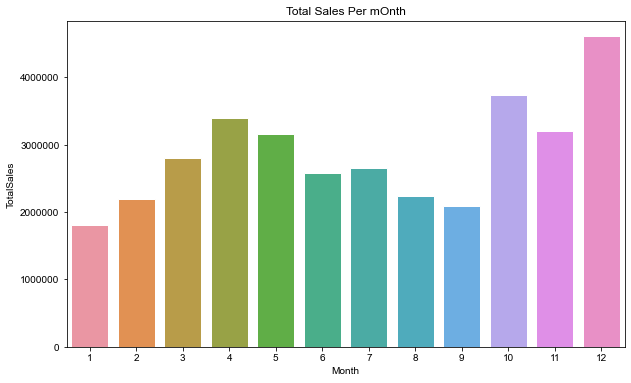

In [66]:
plt.figure(figsize=(10,6))
plt.ticklabel_format(useOffset=False,style='plain')
sns.set_theme(style='whitegrid')
sns.barplot(x='Month',y='TotalSales',data=pd_Sales).set_title('Total Sales Per mOnth')
plt.show()

In [67]:
sales_2019.show(10)

+-------+--------------------+--------+------+-------------------+--------------------+--------------+-----+-----+
|OrderID|             Product|Quantity| Price|          OrderDate|         StoreAdress|          City|State|Month|
+-------+--------------------+--------+------+-------------------+--------------------+--------------+-----+-----+
| 295802|34in Ultrawide Mo...|       1|379.99|2019-12-11 19:45:00|838 Ridge St, San...| San Francisco|   CA|   12|
| 296104|Bose SoundSport H...|       1| 99.99|2019-12-10 18:32:00|111 Elm St, Los A...|   Los Angeles|   CA|   12|
| 296589|27in 4K Gaming Mo...|       1|389.99|2019-12-15 19:44:00|995 Chestnut St, ...|   Los Angeles|   CA|   12|
| 296705|AAA Batteries (4-...|       1|  2.99|2019-12-11 11:07:00|664 West St, Los ...|   Los Angeles|   CA|   12|
| 296864|USB-C Charging Cable|       1| 11.95|2019-12-06 16:13:00|238 Adams St, San...| San Francisco|   CA|   12|
| 297048|AA Batteries (4-p...|       1|  3.84|2019-12-23 18:52:00|731 Walnut St,

In [68]:
sales_2019.select('OrderID','Quantity','City').show()

+-------+--------+--------------+
|OrderID|Quantity|          City|
+-------+--------+--------------+
| 295802|       1| San Francisco|
| 296104|       1|   Los Angeles|
| 296589|       1|   Los Angeles|
| 296705|       1|   Los Angeles|
| 296864|       1| San Francisco|
| 297048|       1|   Los Angeles|
| 297156|       1|        Boston|
| 297256|       1|        Boston|
| 297483|       1|        Boston|
| 297714|       1|   Los Angeles|
| 297755|       1|   Los Angeles|
| 297785|       1| San Francisco|
| 298167|       1|   Los Angeles|
| 298561|       1| San Francisco|
| 298605|       1|        Boston|
| 298748|       1|   Los Angeles|
| 299411|       1|       Atlanta|
| 299438|       1| San Francisco|
| 299449|       1| New York City|
| 299452|       1|       Atlanta|
+-------+--------+--------------+
only showing top 20 rows



In [69]:
#sales per city
sales_q2 = (sales_2019.groupBy('City')
.agg(sum('quantity').alias('TotalProducts'))
.orderBy('Totalproducts',ascending =False))

In [70]:
sales_q2.show()

+--------------+-------------+
|          City|TotalProducts|
+--------------+-------------+
| San Francisco|        50156|
|   Los Angeles|        33246|
| New York City|        27887|
|        Boston|        22490|
|        Dallas|        16705|
|       Atlanta|        16584|
|       Seattle|        16533|
|      Portland|        14035|
|        Austin|        11135|
+--------------+-------------+



In [71]:
pd_Sales_q2 = (sales_q2.toPandas())

In [72]:
pd_Sales_q2

,City,TotalProducts
0,San Francisco,50156
1,Los Angeles,33246
2,New York City,27887
3,Boston,22490
4,Dallas,16705
5,Atlanta,16584
6,Seattle,16533
7,Portland,14035
8,Austin,11135


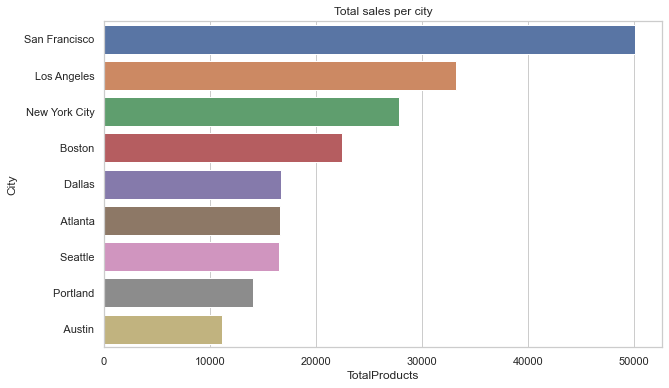

In [73]:
plt.figure(figsize=(10,6))
plt.ticklabel_format(useOffset=False,style='plain')
sns.set_theme(style='darkgrid')
sns.barplot(x='TotalProducts',y='City',data=pd_Sales_q2).set_title('Total sales per city')
plt.xlabel('TotalProducts')
plt.show()

In [74]:
#what products are often sold in NY city
from pyspark.sql.functions import collect_list,size

In [75]:
sales_2019.show()

+-------+--------------------+--------+------+-------------------+--------------------+--------------+-----+-----+
|OrderID|             Product|Quantity| Price|          OrderDate|         StoreAdress|          City|State|Month|
+-------+--------------------+--------+------+-------------------+--------------------+--------------+-----+-----+
| 295802|34in Ultrawide Mo...|       1|379.99|2019-12-11 19:45:00|838 Ridge St, San...| San Francisco|   CA|   12|
| 296104|Bose SoundSport H...|       1| 99.99|2019-12-10 18:32:00|111 Elm St, Los A...|   Los Angeles|   CA|   12|
| 296589|27in 4K Gaming Mo...|       1|389.99|2019-12-15 19:44:00|995 Chestnut St, ...|   Los Angeles|   CA|   12|
| 296705|AAA Batteries (4-...|       1|  2.99|2019-12-11 11:07:00|664 West St, Los ...|   Los Angeles|   CA|   12|
| 296864|USB-C Charging Cable|       1| 11.95|2019-12-06 16:13:00|238 Adams St, San...| San Francisco|   CA|   12|
| 297048|AA Batteries (4-p...|       1|  3.84|2019-12-23 18:52:00|731 Walnut St,

In [78]:
sales_q4 = (sales_2019.where(col('State')=="NY")
                        .orderBy('OrderID','Product')
            .groupBy('OrderID','State')
            .agg(collect_list('Product').alias('ProductList')))

In [79]:
sales_q4.show(10,False)

+-------+-----+----------------------------+
|OrderID|State|ProductList                 |
+-------+-----+----------------------------+
|141264 |NY   |[Apple Airpods Headphones]  |
|141268 |NY   |[AA Batteries (4-pack)]     |
|141272 |NY   |[AAA Batteries (4-pack)]    |
|141278 |NY   |[Lightning Charging Cable]  |
|141282 |NY   |[Vareebadd Phone]           |
|141301 |NY   |[Apple Airpods Headphones]  |
|141314 |NY   |[Macbook Pro Laptop]        |
|141317 |NY   |[27in FHD Monitor]          |
|141323 |NY   |[USB-C Charging Cable]      |
|141343 |NY   |[Bose SoundSport Headphones]|
+-------+-----+----------------------------+
only showing top 10 rows



In [80]:
sales_q4=(sales_q4.withColumn('ProductListsize',size('ProductList')))
sales_q4.filter(col('productListsize')>1).orderBy('ProductList').show(10,False)

+-------+-----+----------------------------------------+---------------+
|OrderID|State|ProductList                             |ProductListsize|
+-------+-----+----------------------------------------+---------------+
|253929 |NY   |[20in Monitor, 27in 4K Gaming Monitor]  |2              |
|197004 |NY   |[20in Monitor, AA Batteries (4-pack)]   |2              |
|158102 |NY   |[20in Monitor, AA Batteries (4-pack)]   |2              |
|248053 |NY   |[20in Monitor, AA Batteries (4-pack)]   |2              |
|266247 |NY   |[20in Monitor, AA Batteries (4-pack)]   |2              |
|176251 |NY   |[20in Monitor, AAA Batteries (4-pack)]  |2              |
|245465 |NY   |[20in Monitor, AAA Batteries (4-pack)]  |2              |
|194762 |NY   |[20in Monitor, AAA Batteries (4-pack)]  |2              |
|204645 |NY   |[20in Monitor, Apple Airpods Headphones]|2              |
|234956 |NY   |[20in Monitor, Apple Airpods Headphones]|2              |
+-------+-----+------------------------------------

In [82]:
(sales_q4.filter(col('productListsize')>1)
 .groupBy('ProductList')
 .count()
 .orderBy('count',ascending=False)).show(10,False)

+-------------------------------------------------+-----+
|ProductList                                      |count|
+-------------------------------------------------+-----+
|[Google Phone, USB-C Charging Cable]             |127  |
|[Lightning Charging Cable, iPhone]               |126  |
|[Google Phone, Wired Headphones]                 |53   |
|[USB-C Charging Cable, Vareebadd Phone]          |50   |
|[Wired Headphones, iPhone]                       |46   |
|[Apple Airpods Headphones, iPhone]               |45   |
|[Bose SoundSport Headphones, Google Phone]       |24   |
|[Apple Airpods Headphones, Wired Headphones]     |19   |
|[Vareebadd Phone, Wired Headphones]              |17   |
|[AA Batteries (4-pack), Lightning Charging Cable]|16   |
+-------------------------------------------------+-----+
only showing top 10 rows



# Databricks 

In [1]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField,StringType
spark =(SparkSession.builder.appName('Sales').getOrCreate())

In [2]:
schema =StructType([
    StructField('Order ID',StringType(),True),
    StructField('Product',StringType(),True),
    StructField('Quantity Ordered',StringType(),True),
    StructField('Price Each',StringType(),True),
    StructField('Order Date',StringType(),True),
    StructField('Purchase Address',StringType(),True),
])

In [3]:
#for data brick 'dbfs:/filestore/data/raw'
path =r'C:\Users\syed3\csv_spark\salesdata'
sales_df=(spark.read.format('csv').option('header',True)
           .schema(schema)
           .load(path))

In [4]:
sales_df.printSchema()

root
 |-- Order ID: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- Quantity Ordered: string (nullable = true)
 |-- Price Each: string (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Purchase Address: string (nullable = true)



In [5]:
spark.sql("CREATE DATABASE IF NOT EXISTS sales_db")

DataFrame[]

In [6]:
spark.sql('use sales_db')

DataFrame[]

In [10]:
# RUN SPARK_SQL IN databrciks works Fine
spark.sql('''CREATE TABLE IF NOT EXISTS sales_raw(
                    OrderID STRING,
                    Product STRING,
                    QuantityOrdered STRING,
                    PriceEach STRING,
                    OrderDate STRING,
                    PurchaseAddress STRING)
                    ''')

AnalysisException: Hive support is required to CREATE Hive TABLE (AS SELECT);
'CreateTable `sales_db`.`sales_raw`, org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe, Ignore


# moviedataset

In [113]:
import findspark
findspark.init()
from pyspark import SparkContext, SparkConf

# this function just creates a python dict we can later use to convert movie_id to movie name printing out the final_result

def loadMoviesNames():
    movie = {}
    d=0
    c=10
    with open(r'C:\Users\syed3\ml-100k\u.item') as f:
        for line in f:
#         if d < c:
            field = line.split('|')

            #print(field[0],field[1])
            movie[int(field[0])] = field[1] 
            #print(movie)
                #d+=1
                #print(movie)
            #print(movie[int(field[0])])
    #print((movie.values()))
    return movie
#Take each line of u.data and convert it to (movieID,(rating,1.0)) This way we can then add all 
#the ratings for each movie, and the total number of ratings for each movie (which lets us compute the average)
def parseInput(line):
    fields = line.split()
    return (int(fields[1]),(float(fields[2]),1.0))
if __name__ == '__main__':
    conf = SparkConf().setAppName('worstMovies')
    sc = SparkContext(conf= conf)
    
    movieNames = loadMoviesNames()
    
    
    lines = sc.textFile(r'C:\Users\syed3\ml-100k\u.data')
    
    
    movieRatings = lines.map(parseInput)
    
    
    ratingTotalsAndCount = movieRatings.reduceByKey(lambda movie1 ,movie2: (movie[0] + movie[1]))
    
    
    averageRatings = ratingTotalsAndCount.mapValues(lambda totalAndCount: totalAndCount[0] / totalAndCount[1])
    
    
    sortedMovies = averageRatings.sortBy(lambda x:x[1])
    
    
    results = sortedMovies.take(10)

In [114]:
loadMoviesNames()

1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0



In [127]:
m={}
with open( r'C:\Users\syed3\ml-100k\u.data') as line:
    for i in line:
        fields = i.split()
        print(int(fields[1]),(float(fields[2]),1.0))
        break

242 (3.0, 1.0)


In [128]:
parseInput(line)

AttributeError: '_io.TextIOWrapper' object has no attribute 'split'